<a href="https://colab.research.google.com/github/abhirupmjdr/CS6910_A1/blob/main/dl_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gradinat Descent (Mitesh Khapra)
import numpy as np
X = [0.5,2.5]
Y = [0.2,0.9]

def fun(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

def grad_w(x,y,w,b):
    fx=fun(x,w,b)
    return (fx-y)*fx*(1-fx)*x

def grad_b(x,y,w,b):
    fx=fun(x,w,b)
    return (fx-y)*fx*(1-fx)

def error(w,b):
    err=0.0
    n=0
    for x,y in zip(X,Y):
        err+=(fun(x,w,b)-y)**2
        n+=1
    return err/n

def gradiant_descent():
    w,b,eta,max_itr=-2,-2,1.0,1000
    for i in range (max_itr):
        dw,db=0,0
        for x,y in zip(X,Y):
            dw+=grad_w(x,y,w,b)
            db+=grad_b(x,y,w,b)
        w=w-eta*dw
        b=b-eta*db
    if i==999:
        print(w,b)
        print(error(w,b))

if __name__=="__main__":
    gradiant_descent()

1.7917198301022377 -2.2821180729166732
0


In [ ]:
# -*- coding: utf-8 -*-
"""Question5.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/11gmNfKBG39ABwUVhkJr-KnagzUBnwk4z
"""

import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
'''
10 distinct images of fashion_mnist class is written and then wandb is initialized and the images are plotted
'''
ImageClasses = ["Pullover","Shirt","Coat","Trouser","Dress","Sandal","Bag","Sneaker","Ankle boot","T-shirt/top"]

from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

'''normalizing the data'''
x_test = x_test / 255.0
x_train = x_train / 255.0

'''train set,val set ,test set split'''
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

x_valT = np.transpose(x_val.reshape(x_val.shape[0] , x_val.shape[1] * x_val.shape[2]))
x_trainT = np.transpose(x_train.reshape(x_train.shape[0] , x_train.shape[1] * x_train.shape[2]))
x_testT = np.transpose(x_test.reshape(x_test.shape[0] , x_test.shape[1] * x_test.shape[2]))
y_trainT = y_train.reshape(1 , y_train.shape[0])
y_valT = y_val.reshape(1 , y_val.shape[0])
y_testT = y_test.reshape(1 , y_test.shape[0])

class ActivationFunction:
  '''all activation functions are defined here'''
  def sigmoid(x):
    return  1 / (1 + np.exp(-x))
  def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)
  def Relu(x):
    return np.maximum(x,0)
  def tanh(x):
    return np.tanh(x)
  def softmax_derivative(x):
    return ActivationFunction.softmax(x) * (1-ActivationFunction.softmax(x))
  def sigmoid_derivative(Z):
    s = 1 /(1 + np.exp(-Z))
    dA = s * (1 - s)
    return dA
  def Relu_derivative(x):
    return 1*(x > 0)
  def tanh_derivative(x):
    return (1 - (np.tanh(x)**2))

class NeuralNetwork:
  '''
  mode_of_initialization =str , The way the weights are initialized
  n_layers = int ,total number of layers
  activation_function = str , activation function of the neural network,default is sigmoid activation function
  n_input = int ,number of inputs
  n_outputs = int , number of outputs
  num_neurns_in_hidden_layer = int ,how many neurons are in each hidden layer
  n_neurons = list having number of neurons in each layer
  TrainInput = input layer's input
  TrainOutput = output layer's output
  ValInput = Validation Input
  ValOutput = validation output
  parameters = dict ,stores the parameters of the model
  cache = dict , stores the H and A for each layer which help in gradient computation
  grads = dict ,store the gradients
    '''
  mode_of_initialization = ""
  n_layers = 0
  activation_function = ""
  n_input = 0
  n_output = 0
  num_neurons_in_hidden_layers = 0
  n_neurons = []
  TrainInput = []
  TrainOutput = []
  ValInput = []
  ValOutput = []
  parameters = {}
  cache = {}
  grads = {}
  def __init__(self,mode_of_initialization = 'random',number_of_hidden_layers = 1,num_neurons_in_hidden_layers = 4,activation = 'sigmoid',TrainInput = x_trainT,TrainOutput = y_trainT,ValInput = x_valT,ValOutput = y_valT):

    self.mode_of_initialization = mode_of_initialization
    neuronsPerLayer = []
    self.num_neurons_in_hidden_layers = num_neurons_in_hidden_layers
    for i in range(number_of_hidden_layers):
      neuronsPerLayer.append(num_neurons_in_hidden_layers)
    self.n_layers = number_of_hidden_layers + 2
    self.activation_function = activation
    self.TrainInput = TrainInput
    self.TrainOutput = TrainOutput
    self.n_input = TrainInput.shape[0]
    self.n_output = TrainOutput[0,TrainOutput.argmax(axis = 1)[0]] + 1
    self.n_neurons = neuronsPerLayer
    self.n_neurons.append(self.n_output)
    self.n_neurons.insert(0 , self.n_input)
    self.cache["H0"] = TrainInput
    self.cache["A0"] = TrainInput
    self.grads = {}
    self.ValInput = ValInput
    self.ValOutput = ValOutput
    for l in range(1,self.n_layers):
      if self.mode_of_initialization == "random":
        self.parameters["W" + str(l)] = np.random.randn(self.n_neurons[l] , self.n_neurons[l - 1])
      elif self.mode_of_initialization == "xavier":
        limit = np.sqrt(2 / float(self.n_neurons[l - 1] + self.n_neurons[l]))
        self.parameters["W" + str(l)] = np.random.normal(0.0, limit, size=(self.n_neurons[l],self.n_neurons[l - 1]))
      self.parameters["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))


  def output(self,A):
    '''
    uses softmax function in the last layer for calculating the prediction
    '''
    return ActivationFunction.softmax(A)


  def forward(self,X,activation,parameters):
    '''
    calculates H and A for each layer and stores them into cache dictionary. It uses the parameter dictionary .
    '''
    self.cache["H0"] = X
    for l in range(1 , self.n_layers):
      H = self.cache["H" + str(l - 1)]
      # print(H.shape)
      W = self.parameters["W" + str(l)]
      b = self.parameters["b" + str(l)]
      A = np.dot(W , H) + b
      # print(W.shape)
      # print(b.shape)
      self.cache["A" + str(l)] = A
      if activation == 'sigmoid':
         H = ActivationFunction.sigmoid(A)
      elif activation == 'relu':
         H = ActivationFunction.Relu(A)
      elif activation == 'tanh':
         H = ActivationFunction.tanh(A)
      self.cache["H" + str(l)] = H
    yPredicted = self.output(self.cache["A" + str(self.n_layers - 1)])
    return yPredicted

  def predict(self,input):
    '''
    predicts the class of the image , although result is not int , it is probability
    '''
    H = input
    activation = self.activation_function
    for l in range(1 , self.n_layers - 1):
      # print(H.shape)
      W = self.parameters["W" + str(l)]
      b = self.parameters["b" + str(l)]
      A = np.dot(W , H) + b
      # print(W.shape)
      # print(b.shape)
      if activation == 'sigmoid':
         H = ActivationFunction.sigmoid(A)
      elif activation == 'relu':
         H = ActivationFunction.Relu(A)
      elif activation == 'tanh':
         H = ActivationFunction.tanh(A)


    W = self.parameters["W" + str(self.n_layers - 1)]
    b = self.parameters["b" + str(self.n_layers - 1)]
    A = np.dot(W , H) + b
    y_predicted = self.output(A)
    return y_predicted

NN = NeuralNetwork()

print(NN.predict(x_trainT))

[[0.11994532 0.13682959 0.06105959 ... 0.13723868 0.59235629 0.13689276]
 [0.25163098 0.25992294 0.28016269 ... 0.25403603 0.12895459 0.57248959]
 [0.03669064 0.03684221 0.03513156 ... 0.03789504 0.01426023 0.0039766 ]
 ...
 [0.02844356 0.0500063  0.02622639 ... 0.02750218 0.04976222 0.0100033 ]
 [0.19163651 0.14171315 0.19899944 ... 0.19362844 0.04255918 0.1139606 ]
 [0.04519285 0.07596379 0.06984453 ... 0.04543387 0.0215163  0.02550157]]


In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import numpy as np

(train_input, train_output), (test_input, test_output) = fashion_mnist.load_data()
train_input = train_input / 255.0
test_input = test_input / 255.0

# Assuming 'data' is your dataset and 'labels' are corresponding labels/targets
train_input, test_input, train_output, test_output = train_test_split(
    train_input, train_output, test_size=0.2, random_state=42
)

train_inputT = np.transpose(train_input.reshape(train_input.shape[0], -1))

class Activation:

    def sigmoid(x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def softmax(x):
        exp_values = np.exp(x - np.max(x))
        return exp_values / np.sum(exp_values, axis=0, keepdims=True)

    def tanh(x):
        return np.tanh(x)


class Neural_Network:
    def __init__(
        self,
        layers=1,
        hidden_layer_nodes=4,
        activation_function="sigmoid",
        x_train=train_inputT,
        y_train=train_output,
        x_test=test_input,
        y_test=test_output,
    ):
        self.layers = layers
        self.hidden_layer_nodes = hidden_layer_nodes
        self.activation_function = activation_function
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.decode = {"h0": x_train}
        self.decode["A0"] = x_train
        self.n_input = x_train.shape[0]
        self.n_output = 10  # Assuming you have 10 classes in Fashion MNIST
        self.nodes_in_level = [self.n_input]  # Initialize with input layer nodes
        self.thetas = {}
        for l in range(1, self.layers + 2):
            self.nodes_in_level.append(hidden_layer_nodes) if l < self.layers + 1 else self.nodes_in_level.append(
                self.n_output
            )
            self.thetas["W" + str(l)] = np.random.randn(
                self.nodes_in_level[l], self.nodes_in_level[l - 1]
            )
            self.thetas["b" + str(l)] = np.zeros((self.nodes_in_level[l], 1))

    def forward_propagation(self):
        for k in range(1, self.layers + 2):
            W = self.thetas["W" + str(k)]
            b = self.thetas["b" + str(k)]
            h = self.decode["h" + str(k - 1)]
            A = b + np.dot(W, h)
            if self.activation_function == "sigmoid":
                h = Activation.sigmoid(A)
            elif self.activation_function == "tanh":
                h = Activation.tanh(A)
            self.decode["h" + str(k)] = h
            self.decode["A" + str(k)] = A

        y_hat = Activation.softmax(self.decode["A" + str(self.layers + 1)])
        return y_hat


neural_network = Neural_Network()
result = neural_network.forward_propagation()
print(result)


[[0.10013348 0.00676222 0.02234989 ... 0.0397687  0.02069737 0.00749427]
 [0.10013738 0.15123605 0.39413149 ... 0.03664666 0.19659424 0.30401039]
 [0.09979417 0.0482745  0.00955078 ... 0.05159459 0.00698927 0.05777833]
 ...
 [0.09991326 0.14251926 0.0278301  ... 0.28297623 0.12459664 0.03887115]
 [0.10009272 0.04417972 0.182001   ... 0.04951272 0.13784489 0.06064374]
 [0.10002165 0.07634184 0.08359702 ... 0.05792878 0.07231635 0.08949334]]


In [ ]:
#question 3

import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import numpy as np

(train_input, train_output), (test_input, test_output) = fashion_mnist.load_data()

train_input = train_input / 255.0
test_input = test_input / 255.0

# Assuming 'data' is your dataset and 'labels' are corresponding labels/targets
train_input, test_input, train_output, test_output = train_test_split(
    train_input, train_output, test_size=0.2, random_state=42
)

train_inputT = np.transpose(train_input.reshape(train_input.shape[0], -1))

class Activation:
    @staticmethod
    def sigmoid(x):
        # Use np.clip to prevent overflow issues
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    @staticmethod
    def softmax(x):
        exp_values = np.exp(x - np.max(x))
        return exp_values / np.sum(exp_values, axis=0, keepdims=True)

    @staticmethod
    def tanh(x):
        return np.tanh(x)



class Neural_Network:
    def __init__(
        self,
        layers=10,
        hidden_layer_nodes=8,
        activation_function="sigmoid",
        x_train=train_inputT,
        y_train=train_output,
        x_test=test_input,
        y_test=test_output,
    ):
        self.layers = layers
        self.hidden_layer_nodes = hidden_layer_nodes
        self.activation_function = activation_function
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.decode = {"h0": x_train}
        self.decode["A0"] = x_train
        self.n_input = x_train.shape[0]
        self.n_output = 10  # Assuming you have 10 classes in Fashion MNIST
        self.nodes_in_level = [self.n_input]  # Initialize with input layer nodes
        self.thetas = {}
        self.derivatives={}
        self.previous_updates={}
        for l in range(1,self.layers+2):
            self.previous_updates["W"+str(l)]=np.zeros(self.nodes_in_level[l], self.nodes_in_level[l - 1])
            self.previous_updates["b"+str(l)]=np.zeros(self.nodes_in_level[l],1)
        self.y_hat=[]
        for l in range(1, self.layers + 2):
            self.nodes_in_level.append(hidden_layer_nodes) if l < self.layers + 1 else self.nodes_in_level.append(
                self.n_output
            )
            self.thetas["W" + str(l)] = np.random.randn(
                self.nodes_in_level[l], self.nodes_in_level[l - 1]
            )
            self.thetas["b" + str(l)] = np.zeros((self.nodes_in_level[l], 1))
            # printf(self.thetas["W1"])

    def forward_propagation(self):
        for k in range(1, self.layers +  2):
            W = self.thetas["W" + str(k)]
            b = self.thetas["b" + str(k)]
            h = self.decode["h" + str(k - 1)]
            A = b + np.dot(W, h)
            # print("dim of A = ",A.shape)
            if self.activation_function == "sigmoid":
                h = Activation.sigmoid(A)
            elif self.activation_function == "tanh":
                h = Activation.tanh(A)
            # print("printing h in",k)
            # print(h)
            self.decode["h" + str(k)] = h
            self.decode["A" + str(k)] = A

        self.y_hat = Activation.softmax(self.decode["A" + str(self.layers + 1)])
        return self.y_hat


    def backward_propagation(self):
        e_l = np.transpose(np.eye(10)[self.y_train[:]])
        # print("dim of e_l",e_l.shape)
        # print("dim of y_hat",self.y_hat.shape)
        dA = (self.y_hat - e_l)
        # print("dim of dA", dA.shape)
        self.derivatives["dA" + str(self.layers + 1)] = dA
        for k in range(self.layers +1, 0, -1):
            dA = self.derivatives["dA" + str(k)]
            h_prev = self.decode["h" + str(k - 1)]
            A_prev = self.decode["A" + str(k - 1)]
            W = self.thetas["W" + str(k)]
            dW = np.zeros(W.shape)
            db = np.zeros((W.shape[0],1))
            dh_prev = np.zeros(h_prev.shape)
            dA_prev = np.zeros(A_prev.shape)
            dW = np.dot(dA, h_prev.T)
            self.derivatives["dW" + str(k)] = dW
            db = np.sum(dA, axis=1, keepdims=True)
            self.derivatives["db" + str(k)] = db
            if k >= 2:
                dh_prev = np.matmul(W.T,dA)
                if self.activation_function == "sigmoid":
                    dA_prev = np.multiply(dh_prev, (Activation.sigmoid(A_prev) * (1 - Activation.sigmoid(A_prev))))
            self.derivatives["dA" + str(k - 1)] = dA_prev

    def do_mgd(self,eta,beta):
        for l in range(1,self.layers+2):
            self.previous_updates["W"+str(l)]=beta*self.previous_updates["W"+str(l)]+self.derivatives["dW"+str(l)]
            self.previous_updates["b"+str(l)]=beta*self.previous_updates["b"+str(l)]+self.derivatives["db"+str(l)]
            self.thetas["W"+str(l)]=self.thetas["W"+str(l)]-eta*self.previous_updates["W"+str(l)]
            self.thetas["b"+str(l)]=self.thetas["b"+str(l)]-eta*self.previous_updates["b"+str(l)]



    def compute(self):
        epoch = 100
        eta = 0.01
        for iter in range(epoch):
            self.forward_propagation()
            self.backward_propagation()
            # Update weights and biases
            for l in range(1,self.layers):
                W = self.thetas["W" + str(l)]
                dW = self.derivatives["dW" + str(l)]
                W = W - eta * dW
                # print(eta*dW)
                self.thetas["W" + str(l)] = W
                b = self.thetas["b" + str(l)]
                db = self.derivatives["db" + str(l)]
                b = b - eta * db
                self.thetas["b" + str(l)] = b
            if iter >=0 :
                OneHotOfTrueOutput = np.transpose(np.eye(10)[self.y_train[:]])
                sum = -np.sum(OneHotOfTrueOutput * np.log(self.y_hat), axis=0)
                print(sum)



neural_network = Neural_Network()
neural_network.compute()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: abhirupmjdr2 (abhirupmjdr_dl). Use `wandb login --relogin` to force relogin


4422102/4422102 [==============================] - 1s 0us/step


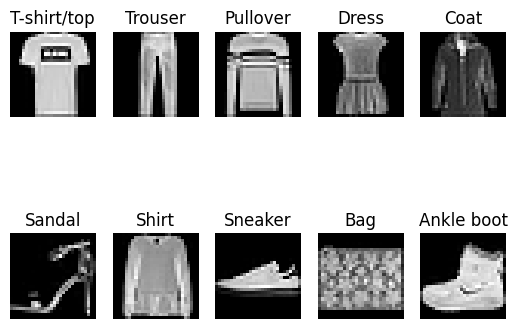

In [ ]:
#question 1
!pip install wandb
import wandb
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import numpy as np

wandb.login()
wandb.init(
      project="deep-learning",
)

(train_input, train_output), (test_input,test_output) = fashion_mnist.load_data()

class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Plot one sample image for each class
class_counts = np.bincount(train_output)
total=len(train_output)
for i in range(len(class_names)):
    # Find the first image with the corresponding class label
    idx=np.where(train_output==i)[0][0]
    # plotting the image
    plt.subplot(2,5,i+1)
    plt.imshow(train_input[idx],cmap='gray')
    plt.title(class_names[i])
    plt.axis("off")

wandb.log({"Sample Images": plt})

In [ ]:
#question 2

import numpy as np
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values
x_test = x_test / 255.0
x_train = x_train / 255.0

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Reshape the data for the neural network
x_val_T = np.transpose(x_val.reshape(x_val.shape[0], -1))
x_train_T = np.transpose(x_train.reshape(x_train.shape[0], -1))
x_test_T = np.transpose(x_test.reshape(x_test.shape[0], -1))
y_train_T = y_train.reshape(1, -1)
y_val_T = y_val.reshape(1, -1)
y_test_T = y_test.reshape(1, -1)

class NeuralNetwork:
    def __init__(self, init_mode='random', num_hidden_layers=3, neurons_per_hidden_layer=64,
                 activation_function='sigmoid', train_input=x_train_T, train_output=y_train_T, val_input=x_val_T,
                 val_output=y_val_T):
        self.init_mode = init_mode
        self.num_hidden_layers = num_hidden_layers
        self.neurons_per_hidden_layer = neurons_per_hidden_layer
        self.activation_function = activation_function
        self.train_input = train_input
        self.train_output = train_output
        self.val_input = val_input
        self.val_output = val_output
        self.n_layers = num_hidden_layers + 2
        self.n_input = train_input.shape[0]
        self.n_output = np.max(train_output) + 1
        self.n_neurons = [self.n_input] + [neurons_per_hidden_layer] * num_hidden_layers + [self.n_output]
        self.cache = {"H0": train_input, "A0": train_input}
        self.theta = {}
        self.grads = {}
        self.initialize_parameters()

    def initialize_parameters(self):
        for l in range(1, self.n_layers):
            if self.init_mode == "random":
                self.theta[f"W{l}"] = np.random.randn(self.n_neurons[l], self.n_neurons[l - 1])
            self.theta[f"b{l}"] = np.zeros((self.n_neurons[l], 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(x, 0)

    def tanh(self, x):
        return np.tanh(x)

    def feedforward(self, input_data):
        H = input_data
        activation = self.activation_function
        for l in range(1, self.n_layers - 1):
            W = self.theta[f"W{l}"]
            b = self.theta[f"b{l}"]
            A = np.dot(W, H) + b
            H = getattr(self, activation)(A)
        W = self.theta[f"W{self.n_layers - 1}"]
        b = self.theta[f"b{self.n_layers - 1}"]
        A = np.dot(W, H) + b
        y_predicted = np.exp(A) / np.sum(np.exp(A), axis=0)
        return y_predicted

# Create an instance of the NeuralNetwork class
my_model = NeuralNetwork()

# Perform a feedforward pass on the training data
my_model.feedforward(x_train_T)


array([[7.17189836e-04, 7.92382105e-01, 2.68383330e-02, ...,
        5.61381915e-01, 6.14603922e-01, 9.85917766e-04],
       [8.80643725e-04, 9.34197738e-05, 6.21725357e-04, ...,
        1.41268356e-03, 1.77846488e-05, 3.10867992e-04],
       [1.40592255e-05, 2.72622768e-04, 2.73089385e-03, ...,
        1.04240689e-04, 6.99702004e-06, 1.22765073e-04],
       ...,
       [6.48656450e-03, 9.71615584e-03, 9.10872740e-03, ...,
        1.20357346e-02, 9.66029082e-03, 2.45277330e-04],
       [7.31659850e-01, 6.71746791e-02, 2.83928657e-01, ...,
        1.80278600e-01, 1.37713602e-02, 9.03969312e-03],
       [2.58008213e-01, 1.24365640e-01, 6.51342471e-01, ...,
        2.34246496e-01, 3.59600689e-01, 9.89132354e-01]])

In [ ]:

#question 2

import numpy as np
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values
x_test = x_test / 255.0
x_train = x_train / 255.0

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Reshape the data for the neural network
x_val_T = np.transpose(x_val.reshape(x_val.shape[0], -1))
x_train_T = np.transpose(x_train.reshape(x_train.shape[0], -1))
x_test_T = np.transpose(x_test.reshape(x_test.shape[0], -1))
y_train_T = y_train.reshape(1, -1)
y_val_T = y_val.reshape(1, -1)
y_test_T = y_test.reshape(1, -1)

class NeuralNetwork:
    def __init__(self, init_mode='random', num_hidden_layers=3, neurons_per_hidden_layer=64,
                 activation_function='sigmoid', train_input=x_train_T, train_output=y_train_T, val_input=x_val_T,
                 val_output=y_val_T):
        self.init_mode = init_mode
        self.num_hidden_layers = num_hidden_layers
        self.neurons_per_hidden_layer = neurons_per_hidden_layer
        self.activation_function = activation_function
        self.train_input = train_input
        self.train_output = train_output
        self.val_input = val_input
        self.val_output = val_output
        self.n_layers = num_hidden_layers + 2
        self.n_input = train_input.shape[0]
        self.n_output = np.max(train_output) + 1
        self.n_neurons = [self.n_input] + [neurons_per_hidden_layer] * num_hidden_layers + [self.n_output]
        self.cache = {"H0": train_input, "A0": train_input}
        self.theta = {}
        self.grads = {}
        self.initialize_parameters()

    def initialize_parameters(self):
        for l in range(1, self.n_layers):
            if self.init_mode == "random":
                self.theta[f"W{l}"] = np.random.randn(self.n_neurons[l], self.n_neurons[l - 1])
            self.theta[f"b{l}"] = np.zeros((self.n_neurons[l], 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(x, 0)

    def tanh(self, x):
        return np.tanh(x)

    def feedforward(self, input_data):
        H = input_data
        activation = self.activation_function
        for layer in range(1, self.n_layers - 1):
            weights = self.theta[f"W{layer}"]
            bias = self.theta[f"b{layer}"]
            activation_input = np.dot(weights, H) + bias
            H = getattr(self, activation)(activation_input)
        weights = self.theta[f"W{self.n_layers - 1}"]
        bias = self.theta[f"b{self.n_layers - 1}"]
        activation_input = np.dot(weights, H) + bias
        softmax_output = np.exp(activation_input) / np.sum(np.exp(activation_input), axis=0)
        return softmax_output

# Create an instance of the NeuralNetwork class
my_model = NeuralNetwork()

# Perform a feedforward pass on the training data
my_model.feedforward(x_train_T)


array([[7.35965753e-04, 2.49221314e-03, 2.22181714e-03, ...,
        2.59736652e-01, 9.20369685e-04, 3.06940101e-01],
       [9.45407402e-01, 9.67868449e-01, 9.91186892e-01, ...,
        4.97157722e-01, 9.67851250e-01, 6.42201677e-01],
       [1.51041597e-08, 1.04321415e-06, 2.04764479e-07, ...,
        1.13048466e-06, 9.79920523e-09, 2.49051787e-05],
       ...,
       [4.82273698e-02, 2.72474901e-02, 3.18747684e-03, ...,
        1.92843696e-01, 2.60612753e-03, 2.20670951e-02],
       [1.07825970e-06, 6.03195039e-09, 1.89584315e-08, ...,
        6.95255501e-06, 1.98360661e-07, 3.10788388e-07],
       [4.57009762e-05, 1.32943321e-06, 9.80227918e-06, ...,
        3.04087786e-04, 3.88490630e-06, 9.79691384e-05]])

In [ ]:

# !pip install wandb

# import wandb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings("ignore")
# wandb.login()

# wandb.init(
#     # set the wandb project where this run will be logged
#     project="deep-learning",

#     # track hyperparameters and run metadata
#     config={
#     "eta": 0.02
#     }
# )




from keras.datasets import m
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


'''normalizing the data'''
x_test = x_test / 255.0
x_train = x_train / 255.0


'''train set,val set ,test set split'''
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
x_train_T = x_train.reshape(-1, x_train.shape[1]*x_train.shape[2]).T
x_val_T = x_val.reshape(-1, x_val.shape[1]*x_val.shape[2]).T
x_test_T = x_test.reshape(-1, x_test.shape[1]*x_test.shape[2]).T
y_train_T, y_val_T, y_test_T = y_train.reshape(1, -1), y_val.reshape(1, -1), y_test.reshape(1, -1)



class Compute:

    @staticmethod
    def sigmoid(x):
        return  1 / (1 + np.exp(-x))

    @staticmethod
    def softmax(x):
        return np.exp(x) / np.sum(np.exp(x), axis=0)

    @staticmethod
    def Relu(x):
        return np.maximum(x,0)

    @staticmethod
    def tanh(x):
        return np.tanh(x)

    @staticmethod
    def softmax_derivative(x):
        return Compute.softmax(x) * (1-Compute.softmax(x))

    @staticmethod
    def sigmoid_derivative(Z):
        s = Compute.sigmoid(Z)
        dA = s * (1 - s)
        return dA

    @staticmethod
    def Relu_derivative(x):
        return 1*(x > 0)

    @staticmethod
    def tanh_derivative(x):
        return (1 - (np.tanh(x)**2))


class Update:
    @staticmethod
    def simple_gradient_descent(eta):
        for l in range(1, my_network.n_layers):
            W, dW = my_network.theta["W" + str(l)], my_network.grads["dW" + str(l)]
            b, db = my_network.theta["b" + str(l)], my_network.grads["db" + str(l)]
            W -= eta * dW
            b -= eta * db
            my_network.theta["W" + str(l)], my_network.theta["b" + str(l)] = W, b

    @staticmethod
    def nesterov_gradient_descent(i,eta, batch_size, beta, previous_updates,loss):
        theta = {}
        input_data = my_network.TrainInput[:, i:i + batch_size]
        output_data = my_network.TrainOutput[0, i:i + batch_size]
        for l in range(1, my_network.n_layers):
            theta["W" + str(l)] = my_network.theta["W" + str(l)] - beta * previous_updates["W" + str(l)]
            theta["b" + str(l)] = my_network.theta["b" + str(l)] - beta * previous_updates["b" + str(l)]
        y_predicted = my_network.forward(input_data, my_network.activation_function, my_network.theta)
        e_y = np.transpose(np.eye(my_network.n_output)[output_data])
        my_network.backpropagation(y_predicted, e_y, batch_size, loss, my_network.activation_function, my_network.theta)
        for l in range(1, my_network.n_layers):
            previous_updates["W" + str(l)] = beta * previous_updates["W" + str(l)] + my_network.grads["dW" + str(l)]
            previous_updates["b" + str(l)] = beta * previous_updates["b" + str(l)] + my_network.grads["db" + str(l)]
            my_network.theta["W" + str(l)] -= eta * my_network.grads["dW" + str(l)]
            my_network.theta["b" + str(l)] -= eta * my_network.grads["db" + str(l)]
        return previous_updates

    @staticmethod
    def momentum_gradient_descent(eta, beta, previous_updates):
        for l in range(1, my_network.n_layers):
            uW, ub = previous_updates["W" + str(l)], previous_updates["b" + str(l)]
            W, dW = my_network.theta["W" + str(l)], my_network.grads["dW" + str(l)]
            b, db = my_network.theta["b" + str(l)], my_network.grads["db" + str(l)]
            uW = beta * uW + dW
            ub = beta * ub + db
            W -= eta * uW
            b -= eta * ub
            previous_updates["W" + str(l)], previous_updates["b" + str(l)] = uW, ub
            my_network.theta["W" + str(l)], my_network.theta["b" + str(l)] = W, b

    @staticmethod
    def rms_prop(eta, beta, epsilon, previous_updates):
        for l in range(1, my_network.n_layers):
            previous_updates["W" + str(l)] = beta * previous_updates["W" + str(l)] + (1 - beta) * np.square(
                my_network.grads["dW" + str(l)])
            previous_updates["b" + str(l)] = beta * previous_updates["b" + str(l)] + (1 - beta) * np.square(
                my_network.grads["db" + str(l)])
            factorW = eta / (np.sqrt(previous_updates["W" + str(l)] + epsilon))
            factorb = eta / (np.sqrt(previous_updates["b" + str(l)] + epsilon))
            my_network.theta["W" + str(l)] -= factorW * my_network.grads["dW" + str(l)]
            my_network.theta["b" + str(l)] -= factorb * my_network.grads["db" + str(l)]

    @staticmethod
    def nadam(eta, beta1, beta2, epsilon, M, V, t):
        for l in range(1, my_network.n_layers):
            M["W" + str(l)] = beta1 * M["W" + str(l)] + (1 - beta1) * my_network.grads["dW" + str(l)]
            M["b" + str(l)] = beta1 * M["b" + str(l)] + (1 - beta1) * my_network.grads["db" + str(l)]
            MW_corrected = M["W" + str(l)] / (1 - (beta1 ** (t)))
            Mb_corrected = M["b" + str(l)] / (1 - (beta1 ** (t)))

            V["W" + str(l)] = beta2 * V["W" + str(l)] + (1 - beta2) * np.square(my_network.grads["dW" + str(l)])
            V["b" + str(l)] = beta2 * V["b" + str(l)] + (1 - beta2) * np.square(my_network.grads["db" + str(l)])
            VW_corrected = V["W" + str(l)] / (1 - (beta2 ** (t)))
            Vb_corrected = V["b" + str(l)] / (1 - (beta2 ** (t)))

            factorW = eta / (np.sqrt(VW_corrected) + epsilon)
            factorb = eta / (np.sqrt(Vb_corrected) + epsilon)
            term1 = 1 - (beta1 ** (t))
            term2 = (1 - beta1) * my_network.grads["dW" + str(l)] / term1
            term3 = (1 - beta1) * my_network.grads["db" + str(l)] / term1
            my_network.theta["W" + str(l)] -= factorW * (beta1 * MW_corrected + term2)
            my_network.theta["b" + str(l)] -= factorb * (beta1 * Mb_corrected + term3)
        return M, V, t + 1

    @staticmethod
    def adam(eta, beta1, beta2, epsilon, M, V, t):
        for l in range(1, my_network.n_layers):
            M["W" + str(l)] = beta1 * M["W" + str(l)] + (1 - beta1) * my_network.grads["dW" + str(l)]
            M["b" + str(l)] = beta1 * M["b" + str(l)] + (1 - beta1) * my_network.grads["db" + str(l)]
            V["W" + str(l)] = beta2 * V["W" + str(l)] + (1 - beta2) * np.square(my_network.grads["dW" + str(l)])
            V["b" + str(l)] = beta2 * V["b" + str(l)] + (1 - beta2) * np.square(my_network.grads["db" + str(l)])
            MW_corrected = M["W" + str(l)] / (1 - (beta1 ** t))
            Mb_corrected = M["b" + str(l)] / (1 - (beta1 ** t))
            VW_corrected = V["W" + str(l)] / (1 - (beta2 ** t))
            Vb_corrected = V["b" + str(l)] / (1 - (beta2 ** t))
            factorW = eta / (np.sqrt(VW_corrected) + epsilon)
            factorb = eta / (np.sqrt(Vb_corrected) + epsilon)
            my_network.theta["W" + str(l)] -= factorW * MW_corrected
            my_network.theta["b" + str(l)] -= factorb * Mb_corrected
        return M, V, t + 1



class MyNeuralNetwork:
  mode_of_initialization = ""
  n_layers = 0
  activation_function = ""
  n_input = 0
  n_output = 0
  n_neurons = []
  TrainInput = []
  TrainOutput = []
  ValInput = []
  ValOutput = []
  theta = {}
  cache = {}
  grads = {}


  def __init__(self,mode_of_initialization="random",number_of_hidden_layers=6,num_neurons_in_hidden_layers=32,activation="sigmoid",TrainInput=x_train_T,TrainOutput=y_train_T,ValInput=x_val_T,ValOutput=y_val_T):
    self.mode_of_initialization = mode_of_initialization
    neuronsPerLayer = []
    for i in range(number_of_hidden_layers):
      neuronsPerLayer.append(num_neurons_in_hidden_layers)
    self.n_layers = number_of_hidden_layers + 2
    self.activation_function = activation
    self.TrainInput = TrainInput
    self.TrainOutput = TrainOutput
    self.n_input = TrainInput.shape[0]
    self.n_output = TrainOutput[0,TrainOutput.argmax(axis = 1)[0]] + 1
    self.n_neurons = neuronsPerLayer
    self.n_neurons.append(self.n_output)
    self.n_neurons.insert(0 , self.n_input)
    self.cache["H0"] = TrainInput
    self.cache["A0"] = TrainInput
    self.grads = {}
    self.ValInput = ValInput
    self.ValOutput = ValOutput
    for l in range(1,self.n_layers):
      if self.mode_of_initialization == "random":
        self.theta["W" + str(l)] = np.random.randn(self.n_neurons[l] , self.n_neurons[l - 1])
      elif self.mode_of_initialization == "xavier":
        limit = np.sqrt(2 / float(self.n_neurons[l - 1] + self.n_neurons[l]))
        self.theta["W" + str(l)] = np.random.normal(0.0, limit, size=(self.n_neurons[l],self.n_neurons[l - 1]))
      self.theta["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))


  def forward(self, X, activation, theta):
    self.cache["H0"] = X
    for l in range(1, self.n_layers):
        H = self.cache["H" + str(l - 1)]
        W = self.theta["W" + str(l)]
        b = self.theta["b" + str(l)]
        A = np.dot(W, H) + b
        self.cache["A" + str(l)] = A
        H = self.apply_activation(A, activation)
        self.cache["H" + str(l)] = H
    Al = self.cache["A" + str(self.n_layers - 1)]
    y_hat= Compute.softmax(Al)

    return y_hat

  def apply_activation(self, A, activation):
        if activation == 'sigmoid':
            return Compute.sigmoid(A)
        elif activation == 'relu':
            return Compute.Relu(A)
        elif activation == 'tanh':
            return Compute.tanh(A)

  def loss(self, input, true_output, predicted_output, loss, batch_size):
    if loss == 'cross_entropy':
        one_hot_true_output = np.eye(self.n_output)[true_output[0]].T
        loss_value = -np.sum(one_hot_true_output * np.log(predicted_output + 1e-9)) / batch_size
    return loss_value

  def accuracy(self, input, true_output, predicted_output):
    predicted_labels = np.argmax(predicted_output, axis=0)
    correct_predictions = np.sum(true_output == predicted_labels)
    total_samples = true_output.shape[1]
    accuracy_percentage = (correct_predictions / total_samples) * 100
    return accuracy_percentage

  def backpropagation(self, y_predicted, e_y, batch_size, loss, activation, theta):
        if loss == 'cross_entropy':
            dA = y_predicted - e_y
        m = dA.shape[1]
        self.grads["dA" + str(self.n_layers - 1)] = dA

        for k in range(self.n_layers - 1, 0, -1):
            dA = self.grads["dA" + str(k)]
            H_prev = self.cache["H" + str(k - 1)]
            A_prev = self.cache["A" + str(k - 1)]
            W = self.theta["W" + str(k)]

            dW, db, dH_prev, dA_prev = self.calculate_gradients(k, dA, H_prev, A_prev, W, activation, batch_size)

            self.grads["dA" + str(k - 1)] = dA_prev
            self.grads["dW" + str(k)] = dW
            self.grads["db" + str(k)] = db

        return

  def calculate_gradients(self, k, dA, H_prev, A_prev, W, activation, batch_size):
        dW = self.calculate_dW(dA, H_prev, batch_size)
        db = self.calculate_db(dA, batch_size)
        dH_prev, dA_prev = self.calculate_dH_prev_dA_prev(k, W, dA, activation, A_prev) if k > 1 else (np.zeros(H_prev.shape), np.zeros(A_prev.shape))

        return dW, db, dH_prev, dA_prev

  def calculate_dW(self, dA, H_prev, batch_size):
        return np.dot(dA, H_prev.T) / batch_size

  def calculate_db(self, dA, batch_size):
        return np.sum(dA, axis=1, keepdims=True) / batch_size

  def calculate_dH_prev_dA_prev(self, k, W, dA, activation, A_prev):
        dH_prev = np.matmul(W.T, dA)
        dA_prev = self.calculate_dA_prev(dH_prev, activation, A_prev)
        return dH_prev, dA_prev

  def calculate_dA_prev(self, dH_prev, activation, A_prev):
        if activation == 'sigmoid':
            return dH_prev * Compute.sigmoid_derivative(A_prev)
        elif activation == 'tanh':
            return dH_prev * Compute.tanh_derivative(A_prev)
        elif activation == 'relu':
            return dH_prev * Compute.Relu_derivative(A_prev)


  def compute(self, eta = 0.001,beta = 0.9,beta1 = 0.9,beta2 = 0.999 ,epsilon = 1e-6, optimizer = 'sgd',batch_size = 100,loss = 'cross_entropy',epochs = 20):
    train_c_epoch, tarin_acc_per_epoch, val_c_per_epoch, val_acc_per_epoch, previous_updates, M, V = [], [], [], [], {}, {}, {}
    for l in range(1 , self.n_layers):
      previous_updates["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      previous_updates["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    for l in range(1 , self.n_layers):
      M["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      M["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
      V["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      V["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    t = 1
    for count in range(epochs):
      for i in range(0 , self.TrainInput.shape[1],batch_size):
        if i + batch_size > self.TrainInput.shape[1]:
          continue
        theta = self.theta
        yPredicted = self.forward(self.TrainInput[:,i:i + batch_size],self.activation_function,theta)
        e_y = np.transpose(np.eye(self.n_output)[self.TrainOutput[0,i : i + batch_size]])
        self.backpropagation(yPredicted,e_y,batch_size,loss,self.activation_function,theta)
        if optimizer == 'sgd':   #referred slide page 54
            Update.simple_gradient_descent(eta)
        elif optimizer == 'nag':
            previous_updates=Update.nesterov_gradient_descent(i,eta, batch_size, beta, previous_updates,loss)

        elif optimizer == 'momentum': #referred from slide 43
          Update.momentum_gradient_descent(eta,beta,previous_updates)

        elif optimizer == 'RMSprop':
          Update.rms_prop(eta,beta,epsilon,previous_updates)
        elif optimizer == 'adam':
          epsilon = 1e-8
          M , V , t= Update.adam(eta,beta1,beta2,epsilon,M , V , t)
        elif optimizer == 'nadam':
          epsilon = 1e-8
          M , V , t= Update.nadam(eta,beta1,beta2,epsilon,M , V , t)

      y_hat = self.forward(self.TrainInput,self.activation_function,self.theta)
      valy_hat = self.forward(self.ValInput,self.activation_function,self.theta)
      train_cost = self.loss(self.TrainInput,self.TrainOutput,y_hat,loss,self.TrainInput.shape[1])
      train_c_epoch.append(train_cost)
      val_cost = self.loss(self.ValInput,self.ValOutput,valy_hat,loss,self.ValInput.shape[1])
      val_c_per_epoch.append(val_cost)
      train_acc = self.accuracy(self.TrainInput, self.TrainOutput,y_hat)
      tarin_acc_per_epoch.append(train_acc)

      val_acc = self.accuracy(self.ValInput, self.ValOutput,valy_hat)
      val_acc_per_epoch.append(val_acc)

    #   if count==epochs-1:
        # conf_data=confusion_matrix(self.ValOutput[0], valy_hat[0])
        # seaborn.heatmap(conf_data, annot=True, cmap='Blues', fmt='g')
        # plt.xlabel('Predicted labels')
        # plt.ylabel('True labels')
        # plt.title('Confusion Matrix')
        # plt.show()

    #   print("---------"*20)
    #   print(f"Epoch Number = {format(count+1)}")
    #   print(f"Training Accuracy = {format(tarin_acc_per_epoch[-1])}")
    #   print(f"Validation Accuracy = {format(val_acc_per_epoch[-1])}")
      # wandb.log({"training_accuracy": train_acc,"validation_accuracy": val_acc,"training_loss":train_cost,"validation_loss": val_cost,"epoch": count})
    return train_c_epoch,tarin_acc_per_epoch,val_c_per_epoch,val_acc_per_epoch


my_network = MyNeuralNetwork()
my_network.compute(eta = 0.01, beta = 0.9 , beta1 = 0.9 , beta2 = 0.999 , epsilon = 0.001, optimizer = 'sgd' , batch_size = 16 , loss = 'cross_entropy' , epochs = 1)


In [ ]:

# !pip install wandb

# import wandb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,ConfusionMatrixDisplay
from keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings("ignore")
# wandb.login()

# wandb.init(
#     # set the wandb project where this run will be logged
#     project="deep-learning",

#     # track hyperparameters and run metadata
#     config={
#     "eta": 0.02
#     }
# )




from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


'''normalizing the data'''
x_test = x_test / 255.0
x_train = x_train / 255.0


'''train set,val set ,test set split'''
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
x_train_T = x_train.reshape(-1, x_train.shape[1]*x_train.shape[2]).T
x_val_T = x_val.reshape(-1, x_val.shape[1]*x_val.shape[2]).T
x_test_T = x_test.reshape(-1, x_test.shape[1]*x_test.shape[2]).T
y_train_T, y_val_T, y_test_T = y_train.reshape(1, -1), y_val.reshape(1, -1), y_test.reshape(1, -1)

class Util:

    @staticmethod
    def apply_activation(A, activation):
            if activation == 'sigmoid':
                return Compute.sigmoid(A)
            elif activation == 'relu':
                return Compute.Relu(A)
            elif activation == 'tanh':
                return Compute.tanh(A)

    @staticmethod
    def loss(input, true_output, predicted_output, loss, batch_size):
        if loss == 'cross_entropy':
            one_hot_true_output = np.eye(my_network.n_output)[true_output[0]].T
            return -np.sum(one_hot_true_output * np.log(predicted_output + 1e-9)) / batch_size


        if loss=='squared_loss':
            one_hot_true_output = np.eye(my_network.n_output)[true_output[0]].T
            loss_factor=np.square(predicted_output-one_hot_true_output)
            return np.sum(loss_factor)/batch_size

    @staticmethod
    def accuracy(input, true_output, predicted_output):
        predicted_labels = np.argmax(predicted_output, axis=0)
        correct_predictions = np.sum(true_output == predicted_labels)
        total_samples = true_output.shape[1]
        accuracy_percentage = (correct_predictions / total_samples) * 100
        return accuracy_percentage

class Compute:

    @staticmethod
    def sigmoid(x):
        return  1 / (1 + np.exp(-x))

    @staticmethod
    def softmax(x):
        return np.exp(x) / np.sum(np.exp(x), axis=0)

    @staticmethod
    def Relu(x):
        return np.maximum(x,0)

    @staticmethod
    def tanh(x):
        return (2 * Compute.sigmoid(2 * x)) - 1

    @staticmethod
    def softmax_derivative(x):
        return Compute.softmax(x) * (1-Compute.softmax(x))

    @staticmethod
    def sigmoid_derivative(Z):
        s = Compute.sigmoid(Z)
        dA = s * (1 - s)
        return dA

    @staticmethod
    def Relu_derivative(x):
        return 1*(x > 0)

    @staticmethod
    def tanh_derivative(x):
        return (1 - (Compute.tanh(x)**2))

    @staticmethod
    def calculate_gradients(k, dA, H_prev, A_prev, W, activation, batch_size):
            dW = Compute.calculate_dW(dA, H_prev, batch_size)
            db = Compute.calculate_db(dA, batch_size)
            dH_prev, dA_prev = Compute.calculate_dH_prev_dA_prev(k, W, dA, activation, A_prev) if k > 1 else (np.zeros(H_prev.shape), np.zeros(A_prev.shape))

            return dW, db, dH_prev, dA_prev
    @staticmethod
    def calculate_dW(dA, H_prev, batch_size):
            return np.dot(dA, H_prev.T) / batch_size

    @staticmethod
    def calculate_db(dA, batch_size):
            return np.sum(dA, axis=1, keepdims=True) / batch_size

    @staticmethod
    def calculate_dH_prev_dA_prev(k, W, dA, activation, A_prev):
            dH_prev = np.matmul(W.T, dA)
            dA_prev = Compute.calculate_dA_prev(dH_prev, activation, A_prev)
            return dH_prev, dA_prev

    @staticmethod
    def calculate_dA_prev(dH_prev, activation, A_prev):
            if activation == 'sigmoid':
                return dH_prev * Compute.sigmoid_derivative(A_prev)
            elif activation == 'tanh':
                return dH_prev * Compute.tanh_derivative(A_prev)
            elif activation == 'relu':
                return dH_prev * Compute.Relu_derivative(A_prev)


class Update:
    @staticmethod
    def simple_gradient_descent(eta):
        for l in range(1, my_network.n_layers):
            W, dW = my_network.theta["W" + str(l)], my_network.grads["dW" + str(l)]
            b, db = my_network.theta["b" + str(l)], my_network.grads["db" + str(l)]
            W -= eta * dW
            b -= eta * db
            my_network.theta["W" + str(l)], my_network.theta["b" + str(l)] = W, b

    @staticmethod
    def nesterov_gradient_descent(i,eta, batch_size, beta, previous_updates,loss):
        theta = {}
        input_data = my_network.TrainInput[:, i:i + batch_size]
        output_data = my_network.TrainOutput[0, i:i + batch_size]
        for l in range(1, my_network.n_layers):
            theta["W" + str(l)] = my_network.theta["W" + str(l)] - beta * previous_updates["W" + str(l)]
            theta["b" + str(l)] = my_network.theta["b" + str(l)] - beta * previous_updates["b" + str(l)]
        y_predicted = my_network.forward(input_data, my_network.activation_function, my_network.theta)
        e_y = np.transpose(np.eye(my_network.n_output)[output_data])
        my_network.backpropagation(y_predicted, e_y, batch_size, loss, my_network.activation_function, my_network.theta)
        for l in range(1, my_network.n_layers):
            previous_updates["W" + str(l)] = beta * previous_updates["W" + str(l)] + my_network.grads["dW" + str(l)]
            previous_updates["b" + str(l)] = beta * previous_updates["b" + str(l)] + my_network.grads["db" + str(l)]
            my_network.theta["W" + str(l)] -= eta * my_network.grads["dW" + str(l)]
            my_network.theta["b" + str(l)] -= eta * my_network.grads["db" + str(l)]
        return previous_updates

    @staticmethod
    def momentum_gradient_descent(eta, beta, previous_updates):
        for l in range(1, my_network.n_layers):
            uW, ub = previous_updates["W" + str(l)], previous_updates["b" + str(l)]
            W, dW = my_network.theta["W" + str(l)], my_network.grads["dW" + str(l)]
            b, db = my_network.theta["b" + str(l)], my_network.grads["db" + str(l)]
            uW = beta * uW + dW
            ub = beta * ub + db
            W -= eta * uW
            b -= eta * ub
            previous_updates["W" + str(l)], previous_updates["b" + str(l)] = uW, ub
            my_network.theta["W" + str(l)], my_network.theta["b" + str(l)] = W, b
            return previous_updates

    @staticmethod
    def rms_prop(eta, beta, epsilon, previous_updates):
        for l in range(1, my_network.n_layers):
            previous_updates["W" + str(l)] = beta * previous_updates["W" + str(l)] + (1 - beta) * np.square(
                my_network.grads["dW" + str(l)])
            previous_updates["b" + str(l)] = beta * previous_updates["b" + str(l)] + (1 - beta) * np.square(
                my_network.grads["db" + str(l)])
            factorW = eta / (np.sqrt(previous_updates["W" + str(l)] + epsilon))
            factorb = eta / (np.sqrt(previous_updates["b" + str(l)] + epsilon))
            my_network.theta["W" + str(l)] -= factorW * my_network.grads["dW" + str(l)]
            my_network.theta["b" + str(l)] -= factorb * my_network.grads["db" + str(l)]
            return previous_updates
            '''
            Working previously fetched an issue that the previous_updates should be returned
            if not then it is showing validation accuracy as 9.05%
            but after returning this slightly better
            '''

    @staticmethod
    def nadam(eta, beta1, beta2, epsilon, M, V, t):
        for l in range(1, my_network.n_layers):
            M["W" + str(l)] = beta1 * M["W" + str(l)] + (1 - beta1) * my_network.grads["dW" + str(l)]
            M["b" + str(l)] = beta1 * M["b" + str(l)] + (1 - beta1) * my_network.grads["db" + str(l)]
            MW_corrected = M["W" + str(l)] / (1 - (beta1 ** (t)))
            Mb_corrected = M["b" + str(l)] / (1 - (beta1 ** (t)))

            V["W" + str(l)] = beta2 * V["W" + str(l)] + (1 - beta2) * np.square(my_network.grads["dW" + str(l)])
            V["b" + str(l)] = beta2 * V["b" + str(l)] + (1 - beta2) * np.square(my_network.grads["db" + str(l)])
            VW_corrected = V["W" + str(l)] / (1 - (beta2 ** (t)))
            Vb_corrected = V["b" + str(l)] / (1 - (beta2 ** (t)))

            factorW = eta / (np.sqrt(VW_corrected) + epsilon)
            factorb = eta / (np.sqrt(Vb_corrected) + epsilon)
            term1 = 1 - (beta1 ** (t))
            term2 = (1 - beta1) * my_network.grads["dW" + str(l)] / term1
            term3 = (1 - beta1) * my_network.grads["db" + str(l)] / term1
            my_network.theta["W" + str(l)] -= factorW * (beta1 * MW_corrected + term2)
            my_network.theta["b" + str(l)] -= factorb * (beta1 * Mb_corrected + term3)
        return M, V, t + 1

    @staticmethod
    def adam(eta, beta1, beta2, epsilon, M, V, t):
        for l in range(1, my_network.n_layers):
            M["W" + str(l)] = beta1 * M["W" + str(l)] + (1 - beta1) * my_network.grads["dW" + str(l)]
            V["W" + str(l)] = beta2 * V["W" + str(l)] + (1 - beta2) * np.square(my_network.grads["dW" + str(l)])
            M["b" + str(l)] = beta1 * M["b" + str(l)] + (1 - beta1) * my_network.grads["db" + str(l)]
            V["b" + str(l)] = beta2 * V["b" + str(l)] + (1 - beta2) * np.square(my_network.grads["db" + str(l)])
            MW_corrected = M["W" + str(l)] / (1 - (beta1 ** t))
            Mb_corrected = M["b" + str(l)] / (1 - (beta1 ** t))
            VW_corrected = V["W" + str(l)] / (1 - (beta2 ** t))
            Vb_corrected = V["b" + str(l)] / (1 - (beta2 ** t))
            my_network.theta["W" + str(l)] -= (eta / (np.sqrt(VW_corrected) + epsilon)) * MW_corrected
            my_network.theta["b" + str(l)] -= (eta / (np.sqrt(Vb_corrected) + epsilon)) * Mb_corrected
        return M, V, t + 1



class MyNeuralNetwork:
  mode_of_initialization = ""
  n_layers = 0
  activation_function = ""
  n_input = 0
  n_output = 0
  n_neurons = []
  TrainInput = []
  TrainOutput = []
  ValInput = []
  ValOutput = []
  theta = {}
  cache = {}
  grads = {}


  def __init__(self,mode_of_initialization="random",number_of_hidden_layers=1,num_neurons_in_hidden_layers=4,activation="sigmoid",TrainInput=x_train_T,TrainOutput=y_train_T,ValInput=x_val_T,ValOutput=y_val_T):
    self.mode_of_initialization = mode_of_initialization
    neuronsPerLayer = []
    for i in range(number_of_hidden_layers):
      neuronsPerLayer.append(num_neurons_in_hidden_layers)
    self.n_layers = number_of_hidden_layers + 2
    self.activation_function = activation
    self.TrainInput = TrainInput
    self.TrainOutput = TrainOutput
    self.n_input = TrainInput.shape[0]
    self.n_output = TrainOutput[0,TrainOutput.argmax(axis = 1)[0]] + 1
    self.n_neurons = neuronsPerLayer
    self.n_neurons.append(self.n_output)
    self.n_neurons.insert(0 , self.n_input)
    self.cache["H0"] = TrainInput
    self.cache["A0"] = TrainInput
    self.grads = {}
    self.ValInput = ValInput
    self.ValOutput = ValOutput
    for l in range(1,self.n_layers):
      if self.mode_of_initialization == "random":
        self.theta["W" + str(l)] = np.random.randn(self.n_neurons[l] , self.n_neurons[l - 1])
      elif self.mode_of_initialization == "xavier":
        limit = np.sqrt(2 / float(self.n_neurons[l - 1] + self.n_neurons[l]))
        self.theta["W" + str(l)] = np.random.normal(0.0, limit, size=(self.n_neurons[l],self.n_neurons[l - 1]))
      self.theta["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))


  def forward(self, X, activation, theta):
    self.cache["H0"] = X
    for l in range(1, self.n_layers):
        H = self.cache["H" + str(l - 1)]
        W = self.theta["W" + str(l)]
        b = self.theta["b" + str(l)]
        A = np.dot(W, H) + b
        self.cache["A" + str(l)] = A
        H = Util.apply_activation(A, activation)
        self.cache["H" + str(l)] = H
    Al = self.cache["A" + str(self.n_layers - 1)]
    y_hat= Compute.softmax(Al)

    return y_hat


  def backpropagation(self, y_predicted, e_y, batch_size, loss, activation, theta):
        if loss == 'cross_entropy':
            dA = y_predicted - e_y
        elif loss=='squared_loss':
            dA=(y_predicted - e_y)*Compute.softmax_derivative(self.cache["A" + str(self.n_layers - 1)])
        m = dA.shape[1]
        self.grads["dA" + str(self.n_layers - 1)] = dA

        for k in range(self.n_layers - 1, 0, -1):
            dA = self.grads["dA" + str(k)]
            H_prev = self.cache["H" + str(k - 1)]
            A_prev = self.cache["A" + str(k - 1)]
            W = self.theta["W" + str(k)]

            dW, db, dH_prev, dA_prev = Compute.calculate_gradients(k, dA, H_prev, A_prev, W, activation, batch_size)

            self.grads["dA" + str(k - 1)] = dA_prev
            self.grads["dW" + str(k)] = dW
            self.grads["db" + str(k)] = db

        return




  def compute(self, eta = 0.1,beta = 0.5,beta1 = 0.5,beta2 = 0.5 ,epsilon = 0.000001, optimizer = 'sgd',batch_size = 4,loss = 'cross_entropy',epochs = 1):
    train_c_epoch, tarin_acc_per_epoch, val_c_per_epoch, val_acc_per_epoch, previous_updates, M, V = [], [], [], [], {}, {}, {}
    for l in range(1 , self.n_layers):
      previous_updates["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      previous_updates["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    for l in range(1 , self.n_layers):
      M["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      M["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
      V["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      V["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    t = 1
    for count in range(epochs):
      for i in range(0 , self.TrainInput.shape[1],batch_size):
        if i + batch_size > self.TrainInput.shape[1]:
          continue
        theta = self.theta
        yPredicted = self.forward(self.TrainInput[:,i:i + batch_size],self.activation_function,theta)
        e_y = np.transpose(np.eye(self.n_output)[self.TrainOutput[0,i : i + batch_size]])
        self.backpropagation(yPredicted,e_y,batch_size,loss,self.activation_function,theta)
        if optimizer == 'sgd':   #referred slide page 54
            Update.simple_gradient_descent(eta) #working
        elif optimizer == 'nag':
            previous_updates=Update.nesterov_gradient_descent(i,eta, batch_size, beta, previous_updates,loss) #working

        elif optimizer == 'momentum': #referred from slide 43
          previous_updates=Update.momentum_gradient_descent(eta,beta,previous_updates) #working

        elif optimizer == 'RMSprop':
          previosu_updates=Update.rms_prop(eta,beta,epsilon,previous_updates) #not working
        elif optimizer == 'adam':
          epsilon = 1e-8
          M , V ,t= Update.adam(eta,beta1,beta2,epsilon,M , V , t)
        elif optimizer == 'nadam':
          epsilon = 1e-8
          M , V , t= Update.nadam(eta,beta1,beta2,epsilon,M , V , t)

      y_hat = self.forward(self.TrainInput,self.activation_function,self.theta)
      valy_hat = self.forward(self.ValInput,self.activation_function,self.theta)
      train_cost = Util.loss(self.TrainInput,self.TrainOutput,y_hat,loss,self.TrainInput.shape[1])
      train_c_epoch.append(train_cost)
      val_cost = Util.loss(self.ValInput,self.ValOutput,valy_hat,loss,self.ValInput.shape[1])
      val_c_per_epoch.append(val_cost)
      train_acc = Util.accuracy(self.TrainInput, self.TrainOutput,y_hat)
      tarin_acc_per_epoch.append(train_acc)

      val_acc = Util.accuracy(self.ValInput, self.ValOutput,valy_hat)
      val_acc_per_epoch.append(val_acc)
    #   print(np.eye(self.n_output)[self.ValOutput[0]].T.shape,valy_hat.shape)
      conf_matrix = confusion_matrix(np.argmax(np.eye(self.n_output)[self.ValOutput[0]].T, axis=0),
                                np.argmax(valy_hat, axis=0))

      '''
        # Print confusion matrix
      cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["T-shirt/top",
                                                                        "Trouser",
                                                                        "Pullover",
                                                                        "Dress",
                                                                        "Coat",
                                                                        "Sandal",
                                                                        "Shirt",
                                                                        "Sneaker",
                                                                        "Bag",
                                                                        "Ankle boot"])

        # Customize appearance
      cm_display.plot(cmap='Oranges')
      plt.xlabel('Predicted Label', fontsize=14)
      plt.ylabel('True Label', fontsize=14)
      plt.title('Confusion Matrix', fontsize=16)
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      wandb.log({"Confusion Matrix at epoch"+str(count+1) : plt})
      '''


      print("---------"*20)
      print(f"Epoch Number = {format(count+1)}")
      print(f"Training Accuracy = {format(tarin_acc_per_epoch[-1])}")
      print(f"Validation Accuracy = {format(val_acc_per_epoch[-1])}")
    #   wandb.log({"training_accuracy": train_acc,"validation_accuracy": val_acc,"training_loss":train_cost,"validation_loss": val_cost,"epoch": count})
    return train_c_epoch,tarin_acc_per_epoch,val_c_per_epoch,val_acc_per_epoch


my_network = MyNeuralNetwork(mode_of_initialization="xavier",number_of_hidden_layers=1,num_neurons_in_hidden_layers=4,activation="sigmoid",TrainInput=x_train_T,TrainOutput=y_train_T,ValInput=x_val_T,ValOutput=y_val_T)
my_network.compute(eta = 0.1,beta = 0.5,beta1 = 0.5,beta2 = 0.5 ,epsilon = 0.05, optimizer = 'adam',batch_size = 4,loss = 'cross_entropy',epochs = 5)


In [ ]:

!pip install wandb

import wandb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,ConfusionMatrixDisplay
from keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings("ignore")
wandb.login()

wandb.init(
    # set the wandb project where this run will be logged
    project="deep-learning",

    # track hyperparameters and run metadata
    config={
    "eta": 0.001,
    "beta" : 0.5,
    "beta1" : 0.1,
    "beta2": 0.1 ,
    "epsilon" : 0.05

    }
)
sweep_config = {
    'method': 'random'
}
metric = {
    'name': 'val_acc_per_epoch',
    'goal': 'maximize'
    }

sweep_config['metric'] = metric

parameters_dict = {
    'optimizer': {
        'values': ['adam', 'nadam', 'sgd']
        },
    'number_of_hidden_layers':{
        'values': [3,4,5]
    },
    'num_neurons_in_hidden_layers': {
        'values': [16, 32, 64,128]
        },
    'activation': {
          'values': ['sigmoid', 'tanh', 'relu']
        },
    'epoch':{
        'values': [5,10,15]
    }
}

sweep_config['parameters'] = parameters_dict

parameters_dict.update({
    'eta': {
        # a flat distribution between 0 and 0.1
        'distribution': 'uniform',
        'min': 0,
        'max': 0.1
      },
    'batch_size': {
        # integers between 32 and 256
        # with evenly-distributed logarithms
        'distribution': 'q_log_uniform_values',
        'q': 8,
        'min': 32,
        'max': 256,
      }
    })

import pprint

pprint.pprint(sweep_config)
sweep_id = wandb.sweep(sweep_config, project="deep-learning")

from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


'''normalizing the data'''
x_test = x_test / 255.0
x_train = x_train / 255.0


'''train set,val set ,test set split'''
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
x_train_T = x_train.reshape(-1, x_train.shape[1]*x_train.shape[2]).T
x_val_T = x_val.reshape(-1, x_val.shape[1]*x_val.shape[2]).T
x_test_T = x_test.reshape(-1, x_test.shape[1]*x_test.shape[2]).T
y_train_T, y_val_T, y_test_T = y_train.reshape(1, -1), y_val.reshape(1, -1), y_test.reshape(1, -1)

class Util:

    @staticmethod
    def apply_activation(A, activation):
            if activation == 'sigmoid':
                return Compute.sigmoid(A)
            elif activation == 'relu':
                return Compute.Relu(A)
            elif activation == 'tanh':
                return Compute.tanh(A)

    @staticmethod
    def loss(input, true_output, predicted_output, loss, batch_size):
        if loss == 'cross_entropy':
            one_hot_true_output = np.eye(my_network.n_output)[true_output[0]].T
            return -np.sum(one_hot_true_output * np.log(predicted_output + 1e-9)) / batch_size


        if loss=='squared_loss':
            one_hot_true_output = np.eye(my_network.n_output)[true_output[0]].T
            loss_factor=np.square(predicted_output-one_hot_true_output)
            return np.sum(loss_factor)/batch_size

    @staticmethod
    def accuracy(input, true_output, predicted_output):
        predicted_labels = np.argmax(predicted_output, axis=0)
        correct_predictions = np.sum(true_output == predicted_labels)
        total_samples = true_output.shape[1]
        accuracy_percentage = (correct_predictions / total_samples) * 100
        return accuracy_percentage


class Compute:

    @staticmethod
    def sigmoid(x):
        return  1 / (1 + np.exp(-x))

    @staticmethod
    def softmax(x):
        return np.exp(x) / np.sum(np.exp(x), axis=0)

    @staticmethod
    def Relu(x):
        return np.maximum(x,0)

    @staticmethod
    def tanh(x):
        return (2 * Compute.sigmoid(2 * x)) - 1

    @staticmethod
    def softmax_derivative(x):
        return Compute.softmax(x) * (1-Compute.softmax(x))

    @staticmethod
    def sigmoid_derivative(Z):
        s = Compute.sigmoid(Z)
        dA = s * (1 - s)
        return dA

    @staticmethod
    def Relu_derivative(x):
        return 1*(x > 0)

    @staticmethod
    def tanh_derivative(x):
        return (1 - (Compute.tanh(x)**2))

    @staticmethod
    def calculate_gradients(k, dA, H_prev, A_prev, W, activation, batch_size):
            dW = Compute.calculate_dW(dA, H_prev, batch_size)
            db = Compute.calculate_db(dA, batch_size)
            dH_prev, dA_prev = Compute.calculate_dH_prev_dA_prev(k, W, dA, activation, A_prev) if k > 1 else (np.zeros(H_prev.shape), np.zeros(A_prev.shape))

            return dW, db, dH_prev, dA_prev
    @staticmethod
    def calculate_dW(dA, H_prev, batch_size):
            return np.dot(dA, H_prev.T) / batch_size

    @staticmethod
    def calculate_db(dA, batch_size):
            return np.sum(dA, axis=1, keepdims=True) / batch_size

    @staticmethod
    def calculate_dH_prev_dA_prev(k, W, dA, activation, A_prev):
            dH_prev = np.matmul(W.T, dA)
            dA_prev = Compute.calculate_dA_prev(dH_prev, activation, A_prev)
            return dH_prev, dA_prev

    @staticmethod
    def calculate_dA_prev(dH_prev, activation, A_prev):
            if activation == 'sigmoid':
                return dH_prev * Compute.sigmoid_derivative(A_prev)
            elif activation == 'tanh':
                return dH_prev * Compute.tanh_derivative(A_prev)
            elif activation == 'relu':
                return dH_prev * Compute.Relu_derivative(A_prev)


class Update:
    @staticmethod
    def stochastic_gradient_descent(eta):
        for l in range(1, my_network.n_layers):
            W, dW = my_network.theta["W" + str(l)], my_network.grads["dW" + str(l)]
            b, db = my_network.theta["b" + str(l)], my_network.grads["db" + str(l)]
            W -= eta * dW
            b -= eta * db
            my_network.theta["W" + str(l)], my_network.theta["b" + str(l)] = W, b

    @staticmethod
    def nesterov_gradient_descent(i,eta, batch_size, beta, previous_updates,loss):
        theta = {}
        input_data = my_network.TrainInput[:, i:i + batch_size]
        output_data = my_network.TrainOutput[0, i:i + batch_size]
        for l in range(1, my_network.n_layers):
            theta["W" + str(l)] = my_network.theta["W" + str(l)] - beta * previous_updates["W" + str(l)]
            theta["b" + str(l)] = my_network.theta["b" + str(l)] - beta * previous_updates["b" + str(l)]
        y_predicted = my_network.forward(input_data, my_network.activation_function, my_network.theta)
        e_y = np.transpose(np.eye(my_network.n_output)[output_data])
        my_network.backpropagation(y_predicted, e_y, batch_size, loss, my_network.activation_function, my_network.theta)
        for l in range(1, my_network.n_layers):
            previous_updates["W" + str(l)] = beta * previous_updates["W" + str(l)] + my_network.grads["dW" + str(l)]
            previous_updates["b" + str(l)] = beta * previous_updates["b" + str(l)] + my_network.grads["db" + str(l)]
            my_network.theta["W" + str(l)] -= eta * my_network.grads["dW" + str(l)]
            my_network.theta["b" + str(l)] -= eta * my_network.grads["db" + str(l)]
        return previous_updates

    @staticmethod
    def momentum_gradient_descent(eta, beta, previous_updates):
        for l in range(1, my_network.n_layers):
            uW, ub = previous_updates["W" + str(l)], previous_updates["b" + str(l)]
            W, dW = my_network.theta["W" + str(l)], my_network.grads["dW" + str(l)]
            b, db = my_network.theta["b" + str(l)], my_network.grads["db" + str(l)]
            uW = beta * uW + dW
            ub = beta * ub + db
            W -= eta * uW
            b -= eta * ub
            previous_updates["W" + str(l)], previous_updates["b" + str(l)] = uW, ub
            my_network.theta["W" + str(l)], my_network.theta["b" + str(l)] = W, b
            return previous_updates

    @staticmethod
    def rms_prop(eta, beta, epsilon, previous_updates):
        for l in range(1, my_network.n_layers):
            previous_updates["W" + str(l)] = beta * previous_updates["W" + str(l)] + (1 - beta) * np.square(
                my_network.grads["dW" + str(l)])
            previous_updates["b" + str(l)] = beta * previous_updates["b" + str(l)] + (1 - beta) * np.square(
                my_network.grads["db" + str(l)])
            factorW = eta / (np.sqrt(previous_updates["W" + str(l)] + epsilon))
            factorb = eta / (np.sqrt(previous_updates["b" + str(l)] + epsilon))
            my_network.theta["W" + str(l)] -= factorW * my_network.grads["dW" + str(l)]
            my_network.theta["b" + str(l)] -= factorb * my_network.grads["db" + str(l)]
            return previous_updates
            '''
            Working previously fetched an issue that the previous_updates should be returned
            if not then it is showing validation accuracy as 9.05%
            but after returning this slightly better
            '''

    @staticmethod
    def nadam(eta, beta1, beta2, epsilon, M, V, t):
        for l in range(1, my_network.n_layers):
            M["W" + str(l)] = beta1 * M["W" + str(l)] + (1 - beta1) * my_network.grads["dW" + str(l)]
            M["b" + str(l)] = beta1 * M["b" + str(l)] + (1 - beta1) * my_network.grads["db" + str(l)]
            MW_corrected = M["W" + str(l)] / (1 - (beta1 ** (t)))
            Mb_corrected = M["b" + str(l)] / (1 - (beta1 ** (t)))

            V["W" + str(l)] = beta2 * V["W" + str(l)] + (1 - beta2) * np.square(my_network.grads["dW" + str(l)])
            V["b" + str(l)] = beta2 * V["b" + str(l)] + (1 - beta2) * np.square(my_network.grads["db" + str(l)])
            VW_corrected = V["W" + str(l)] / (1 - (beta2 ** (t)))
            Vb_corrected = V["b" + str(l)] / (1 - (beta2 ** (t)))

            factorW = eta / (np.sqrt(VW_corrected) + epsilon)
            factorb = eta / (np.sqrt(Vb_corrected) + epsilon)
            term1 = 1 - (beta1 ** (t))
            term2 = (1 - beta1) * my_network.grads["dW" + str(l)] / term1
            term3 = (1 - beta1) * my_network.grads["db" + str(l)] / term1
            my_network.theta["W" + str(l)] -= factorW * (beta1 * MW_corrected + term2)
            my_network.theta["b" + str(l)] -= factorb * (beta1 * Mb_corrected + term3)
        return M, V

    @staticmethod
    def adam(eta, beta1, beta2, epsilon, M, V, t): #taken from slide-2 page 42 [cs6910]
        for l in range(1, my_network.n_layers):
            M["W" + str(l)] = beta1 * M["W" + str(l)] + (1 - beta1) * my_network.grads["dW" + str(l)]
            M["b" + str(l)] = beta1 * M["b" + str(l)] + (1 - beta1) * my_network.grads["db" + str(l)]
            V["W" + str(l)] = beta2 * V["W" + str(l)] + (1 - beta2) * np.square(my_network.grads["dW" + str(l)])
            V["b" + str(l)] = beta2 * V["b" + str(l)] + (1 - beta2) * np.square(my_network.grads["db" + str(l)])
            MW_hat = M["W" + str(l)] / (1 - np.power(beta1,t))
            Mb_hat = M["b" + str(l)] / (1 - np.power(beta1,t))
            VW_hat = V["W" + str(l)] / (1 - np.power(beta2,t))
            Vb_hat = V["b" + str(l)] / (1 - np.power(beta2,t))
            my_network.theta["W" + str(l)] -= (eta / (np.sqrt(VW_hat) + epsilon)) * MW_hat
            my_network.theta["b" + str(l)] -= (eta / (np.sqrt(Vb_hat) + epsilon)) * Mb_hat
        return M, V


class MyNeuralNetwork:
  mode_of_initialization = ""
  n_layers = 0
  activation_function = ""
  n_input = 0
  n_output = 0
  n_neurons = []
  TrainInput = []
  TrainOutput = []
  ValInput = []
  ValOutput = []
  theta = {}
  cache = {}
  grads = {}


  def __init__(self,mode_of_initialization="random",number_of_hidden_layers=1,num_neurons_in_hidden_layers=4,activation="sigmoid",TrainInput=x_train_T,TrainOutput=y_train_T,ValInput=x_val_T,ValOutput=y_val_T):
    self.mode_of_initialization = mode_of_initialization
    neuronsPerLayer = []
    for i in range(number_of_hidden_layers):
      neuronsPerLayer.append(num_neurons_in_hidden_layers)
    self.n_layers = number_of_hidden_layers + 2
    self.activation_function = activation
    self.TrainInput = TrainInput
    self.TrainOutput = TrainOutput
    self.n_input = TrainInput.shape[0]
    self.n_output = TrainOutput[0,TrainOutput.argmax(axis = 1)[0]] + 1
    self.n_neurons = neuronsPerLayer
    self.n_neurons.append(self.n_output)
    self.n_neurons.insert(0 , self.n_input)
    self.cache["H0"] = TrainInput
    self.cache["A0"] = TrainInput
    self.grads = {}
    self.ValInput = ValInput
    self.ValOutput = ValOutput
    for l in range(1,self.n_layers):
      if self.mode_of_initialization == "random":
        self.theta["W" + str(l)] = np.random.randn(self.n_neurons[l] , self.n_neurons[l - 1])
      elif self.mode_of_initialization == "xavier":
        limit = np.sqrt(2 / float(self.n_neurons[l - 1] + self.n_neurons[l]))
        self.theta["W" + str(l)] = np.random.normal(0.0, limit, size=(self.n_neurons[l],self.n_neurons[l - 1]))
      self.theta["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))


  def forward(self, X, activation, theta):
    self.cache["H0"] = X
    for l in range(1, self.n_layers):
        H = self.cache["H" + str(l - 1)]
        W = self.theta["W" + str(l)]
        b = self.theta["b" + str(l)]
        A = np.dot(W, H) + b
        self.cache["A" + str(l)] = A
        H = Util.apply_activation(A, activation)
        self.cache["H" + str(l)] = H
        # print("----"*5,l,"------"*5)
        # print("A")
        # print(H)
        # print('H')
        # print(H)
    Al = self.cache["A" + str(self.n_layers - 1)]
    y_hat= Compute.softmax(Al)

    return y_hat


  def backpropagation(self, y_predicted, e_y, batch_size, loss, activation, theta):
        if loss == 'cross_entropy':
            dA = y_predicted - e_y
        elif loss=='squared_loss':
            dA=(y_predicted - e_y)*Compute.softmax_derivative(self.cache["A" + str(self.n_layers - 1)])
        m = dA.shape[1]
        self.grads["dA" + str(self.n_layers - 1)] = dA

        for k in range(self.n_layers - 1, 0, -1):
            dA = self.grads["dA" + str(k)]
            H_prev = self.cache["H" + str(k - 1)]
            A_prev = self.cache["A" + str(k - 1)]
            W = self.theta["W" + str(k)]

            dW, db, dH_prev, dA_prev = Compute.calculate_gradients(k, dA, H_prev, A_prev, W, activation, batch_size)

            self.grads["dA" + str(k - 1)] = dA_prev
            self.grads["dW" + str(k)] = dW
            self.grads["db" + str(k)] = db
            # print("----"*5,k,"-----"*5)
            # print("dw")
            # print(dW)
            # print("db")
            # print(db)

        return




  def compute(self, eta = 0.1,beta = 0.5,beta1 = 0.5,beta2 = 0.5 ,epsilon = 0.000001, optimizer = 'sgd',batch_size = 4,loss = 'cross_entropy',epochs = 1):
    train_c_epoch, tarin_acc_per_epoch, val_c_per_epoch, val_acc_per_epoch, previous_updates, M, V = [], [], [], [], {}, {}, {}
    for l in range(1 , self.n_layers):
      previous_updates["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      previous_updates["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    for l in range(1 , self.n_layers):
      M["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      M["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
      V["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      V["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    t = 1
    for count in range(epochs):
      for i in range(0 , self.TrainInput.shape[1],batch_size):
        if i + batch_size > self.TrainInput.shape[1]:
          continue
        theta = self.theta
        yPredicted = self.forward(self.TrainInput[:,i:i + batch_size],self.activation_function,theta)
        e_y = np.transpose(np.eye(self.n_output)[self.TrainOutput[0,i : i + batch_size]])
        self.backpropagation(yPredicted,e_y,batch_size,loss,self.activation_function,theta)
        if optimizer == 'sgd':   #referred slide page 54
            Update.stochastic_gradient_descent(eta) #working
        elif optimizer == 'nag':
            previous_updates=Update.nesterov_gradient_descent(i,eta, batch_size, beta, previous_updates,loss) #working

        elif optimizer == 'momentum': #referred from slide 43
          previous_updates=Update.momentum_gradient_descent(eta,beta,previous_updates) #working

        elif optimizer == 'RMSprop':
          previous_updates=Update.rms_prop(eta,beta,epsilon,previous_updates) #working
        elif optimizer == 'adam':
          epsilon = 1e-10
          M , V = Update.adam(eta,beta1,beta2,epsilon,M , V , count+1)
        elif optimizer == 'nadam':
          epsilon = 1e-8
          M , V = Update.nadam(eta,beta1,beta2,epsilon,M , V , count+1)

      y_hat = self.forward(self.TrainInput,self.activation_function,self.theta)
      valy_hat = self.forward(self.ValInput,self.activation_function,self.theta)
      train_cost = Util.loss(self.TrainInput,self.TrainOutput,y_hat,loss,self.TrainInput.shape[1])
      train_c_epoch.append(train_cost)
      val_cost = Util.loss(self.ValInput,self.ValOutput,valy_hat,loss,self.ValInput.shape[1])
      val_c_per_epoch.append(val_cost)
      train_acc = Util.accuracy(self.TrainInput, self.TrainOutput,y_hat)
      tarin_acc_per_epoch.append(train_acc)

      val_acc = Util.accuracy(self.ValInput, self.ValOutput,valy_hat)
      val_acc_per_epoch.append(val_acc)
    #   print(np.eye(self.n_output)[self.ValOutput[0]].T.shape,valy_hat.shape)
      conf_matrix = confusion_matrix(np.argmax(np.eye(self.n_output)[self.ValOutput[0]].T, axis=0),
                                np.argmax(valy_hat, axis=0))

      '''
        # Print confusion matrix
      cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["T-shirt/top",
                                                                        "Trouser",
                                                                        "Pullover",
                                                                        "Dress",
                                                                        "Coat",
                                                                        "Sandal",
                                                                        "Shirt",
                                                                        "Sneaker",
                                                                        "Bag",
                                                                        "Ankle boot"])

        # Customize appearance
      cm_display.plot(cmap='Oranges')
      plt.xlabel('Predicted Label', fontsize=14)
      plt.ylabel('True Label', fontsize=14)
      plt.title('Confusion Matrix', fontsize=16)
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      wandb.log({"Confusion Matrix at epoch"+str(count+1) : plt})
      '''


      print("---------"*20)
      print(f"Epoch Number = {format(count+1)}")
      print(f"Training Accuracy = {format(tarin_acc_per_epoch[-1])}")
      print(f"Validation Accuracy = {format(val_acc_per_epoch[-1])}")
    #   if(count==1):
    #     print(self.cache["A1"])
    #   wandb.log({"training_accuracy": train_acc,"validation_accuracy": val_acc,"training_loss":train_cost,"validation_loss": val_cost,"epoch": count})
    return train_c_epoch,tarin_acc_per_epoch,val_c_per_epoch,val_acc_per_epoch


my_network = MyNeuralNetwork(mode_of_initialization="random",number_of_hidden_layers=4,num_neurons_in_hidden_layers=32,activation="relu",TrainInput=x_train_T,TrainOutput=y_train_T,ValInput=x_val_T,ValOutput=y_val_T)
my_network.compute(eta = 0.001,beta = 0.9,beta1 = 0.1,beta2 = 0.1 ,epsilon = 0.05, optimizer = 'momentum',batch_size = 32,loss = 'cross_entropy',epochs = 5)



wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: ERROR Control-C detected -- Run data was not synced


Problem at: <ipython-input-21-36f220bbbb95> 14 <cell line: 14>


KeyboardInterrupt: 

In [ ]:
wandb.agent(sweep_id, x_val_T, count=5)

In [ ]:
# -*- coding: utf-8 -*-
"""Question5.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/11gmNfKBG39ABwUVhkJr-KnagzUBnwk4z
"""

# -*- coding: utf-8 -*-
"""Question4.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1eNACW0NpHLdZ4r7uYnuR3Vv3GUvP3d68
"""

!pip install wandb

import wandb
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
'''
10 distinct images of fashion_mnist class is written and then wandb is initialized and the images are plotted
'''
ImageClasses = ["Pullover","Shirt","Coat","Trouser","Dress","Sandal","Bag","Sneaker","Ankle boot","T-shirt/top"]

from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
wandb.login()


'''normalizing the data'''
x_test = x_test / 255.0
x_train = x_train / 255.0
'''train set,val set ,test set split'''
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

x_valT = np.transpose(x_val.reshape(x_val.shape[0] , x_val.shape[1] * x_val.shape[2]))
x_trainT = np.transpose(x_train.reshape(x_train.shape[0] , x_train.shape[1] * x_train.shape[2]))
x_testT = np.transpose(x_test.reshape(x_test.shape[0] , x_test.shape[1] * x_test.shape[2]))
y_trainT = y_train.reshape(1 , y_train.shape[0])
y_valT = y_val.reshape(1 , y_val.shape[0])
y_testT = y_test.reshape(1 , y_test.shape[0])

class ActivationFunction:
  '''all activation functions are defined here'''
  def sigmoid(x):
    return  1 / (1 + np.exp(-x))
  def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)
  def Relu(x):
    return np.maximum(x,0)
  def tanh(x):
    return np.tanh(x)
  def softmax_derivative(x):
    return ActivationFunction.softmax(x) * (1-ActivationFunction.softmax(x))
  def sigmoid_derivative(Z):
    s = 1 /(1 + np.exp(-Z))
    dA = s * (1 - s)
    return dA
  def Relu_derivative(x):
    return 1*(x > 0)
  def tanh_derivative(x):
    return (1 - (np.tanh(x)**2))


class NeuralNetwork:
  '''
  mode_of_initialization =str , The way the weights are initialized
  n_layers = int ,total number of layers
  activation_function = str , activation function of the neural network,default is sigmoid activation function
  n_input = int ,number of inputs
  n_outputs = int , number of outputs
  num_neurns_in_hidden_layer = int ,how many neurons are in each hidden layer
  n_neurons = list having number of neurons in each layer
  TrainInput = input layer's input
  TrainOutput = output layer's output
  ValInput = Validation Input
  ValOutput = validation output
  parameters = dict ,stores the parameters of the model
  cache = dict , stores the H and A for each layer which help in gradient computation
  grads = dict ,store the gradients
  '''
  mode_of_initialization = ""
  n_layers = 0
  activation_function = ""
  n_input = 0
  n_output = 0
  num_neurons_in_hidden_layers = 0
  n_neurons = []
  TrainInput = []
  TrainOutput = []
  ValInput = []
  ValOutput = []
  parameters = {}
  cache = {}
  grads = {}
  def __init__(self,mode_of_initialization,number_of_hidden_layers,num_neurons_in_hidden_layers,activation,TrainInput,TrainOutput,ValInput,ValOutput):
    self.mode_of_initialization = mode_of_initialization
    neuronsPerLayer = []
    self.num_neurons_in_hidden_layers = num_neurons_in_hidden_layers
    for i in range(number_of_hidden_layers):
      neuronsPerLayer.append(num_neurons_in_hidden_layers)
    self.n_layers = number_of_hidden_layers + 2
    self.activation_function = activation
    self.TrainInput = TrainInput
    self.TrainOutput = TrainOutput
    self.n_input = TrainInput.shape[0]
    self.n_output = TrainOutput[0,TrainOutput.argmax(axis = 1)[0]] + 1
    self.n_neurons = neuronsPerLayer
    self.n_neurons.append(self.n_output)
    self.n_neurons.insert(0 , self.n_input)
    self.cache["H0"] = TrainInput
    self.cache["A0"] = TrainInput
    self.grads = {}
    self.ValInput = ValInput
    self.ValOutput = ValOutput
    for l in range(1,self.n_layers):
      if self.mode_of_initialization == "random":
        self.parameters["W" + str(l)] = np.random.randn(self.n_neurons[l] , self.n_neurons[l - 1])
      elif self.mode_of_initialization == "xavier":
        limit = np.sqrt(2 / float(self.n_neurons[l - 1] + self.n_neurons[l]))
        self.parameters["W" + str(l)] = np.random.normal(0.0, limit, size=(self.n_neurons[l],self.n_neurons[l - 1]))
      self.parameters["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))


  def output(self,A):
    '''
    uses softmax function in the last layer for calculating the prediction
    '''
    return ActivationFunction.softmax(A)


  def forward(self,X,activation,parameters):
    '''
    X = numpy array ,input dataset
    activation = str , the type of activation function used
    parameters = dict , parameters of the model
    calculates H and A for each layer and stores them into cache dictionary. It uses the parameter dictionary .
    '''
    self.cache["H0"] = X
    for l in range(1 , self.n_layers):
      H = self.cache["H" + str(l - 1)]
      # print(H.shape)
      W = self.parameters["W" + str(l)]
      b = self.parameters["b" + str(l)]
      A = np.dot(W , H) + b
      # print(W.shape)
      # print(b.shape)
      self.cache["A" + str(l)] = A
      if activation == 'sigmoid':
         H = ActivationFunction.sigmoid(A)
      elif activation == 'relu':
         H = ActivationFunction.Relu(A)
      elif activation == 'tanh':
         H = ActivationFunction.tanh(A)
      self.cache["H" + str(l)] = H
    yPredicted = self.output(self.cache["A" + str(self.n_layers - 1)])
    return yPredicted

  def predict(self,input):
    '''
    input = numpy array ,input dataset
    parameters = dict , parameters of the model
    predicts the class of the image , although result is not int , it is probability
    '''
    H = input
    activation = self.activation_function
    for l in range(1 , self.n_layers - 1):
      # print(H.shape)
      W = self.parameters["W" + str(l)]
      b = self.parameters["b" + str(l)]
      A = np.dot(W , H) + b
      # print(W.shape)
      # print(b.shape)
      if activation == 'sigmoid':
         H = ActivationFunction.sigmoid(A)
      elif activation == 'relu':
         H = ActivationFunction.Relu(A)
      elif activation == 'tanh':
         H = ActivationFunction.tanh(A)


    W = self.parameters["W" + str(self.n_layers - 1)]
    b = self.parameters["b" + str(self.n_layers - 1)]
    A = np.dot(W , H) + b
    y_predicted = self.output(A)
    return y_predicted

  def lossFunction(self,input,TrueOutput,PredictedOutput,loss,batch_size,wd):
    '''
    input = numpy array ,input dataset
    TrueOutput = list of str ,TrueOutput label
    PredictedOutput = numpy array ,applying the model to the input we get it
    loss = str , which type of loss will occur
    batch_size = int , on how many data sample it is doing the calculation
    wd = float ,weight deacy
    Finds the loss value
    '''
    lossValue = 0
    # print(PredictedOutput.shape)   (10,54000)
    if loss == 'cross_entropy':
      OneHotOfTrueOutput = np.transpose(np.eye(self.n_output)[TrueOutput[0]])
      sum = -np.sum(OneHotOfTrueOutput * np.log(PredictedOutput + 1e-9))
      lossValue = sum / batch_size
      # print(loss)
      val = 0
      for l in range(1 , self.n_layers):
        for i in range(self.parameters['W' + str(l)].shape[0]):
          for j in range(self.parameters['W' + str(l)].shape[1]):
            val = val + self.parameters['W' + str(l)][i][j] ** 2
    lossValue = lossValue + wd * val
    return lossValue
  def accuracy(self,input,TrueOutput,PredictedOutput):
    '''
    input = numpy array ,input given
    TrueOutput = numpy array, true output label
    PredictedOutput = numpy array, model predicts this output
    finds the accuracy of the model
    '''
    PredictedOutput = np.argmax(PredictedOutput,axis = 0)
    count = 0
    for i in range(TrueOutput.shape[1]):
      if TrueOutput[0,i] == PredictedOutput[i]:
        count = count + 1
    accu = (count / TrueOutput.shape[1]) * 100
    return accu



  def backprop(self, yPredicted , e_y , batchSize,loss,activation,parameters,wd):
    '''
    yPredicted = numpy array ,predicted value by the model
    e_y = numpy array ,One hot vector representation of the True Label
    batch_size = int ,on how many data sample it is doing the calculation
    loss = str , which type of loss will occur
    activation = str , the type of activation function used
    parameters = dict , parameters of the model
    wd = float ,weight decay
    Implements back propagation algorithm and stores the gradient values in the grads dict of the class
    '''
    if loss == 'cross_entropy':
      dA = yPredicted - e_y
    m = dA.shape[1]
    self.grads["dA" + str(self.n_layers - 1)] = dA
    for k in (range(self.n_layers - 1,0,-1)):
      # print(k)
      dA = self.grads["dA" + str(k)]
      H_prev = self.cache["H" + str(k - 1)]
      A_prev = self.cache["A" + str(k - 1)]
      W = self.parameters["W" + str(k)]
      dW = np.zeros(W.shape)
      db = np.zeros((W.shape[0],1))
      dH_prev = np.zeros(H_prev.shape)
      dA_prev = np.zeros(A_prev.shape)

      dW = (np.dot(dA, H_prev.T)) / batchSize
      db = np.sum(dA , axis = 1,keepdims = True)/batchSize
      if k > 1:
        dH_prev = np.matmul(W.T , dA)
        if activation == 'sigmoid':
          dA_prev = dH_prev * ActivationFunction.sigmoid_derivative(A_prev)
        elif activation == 'tanh':
          dA_prev = dH_prev * ActivationFunction.tanh_derivative(A_prev)
        elif activation == 'relu':
          dA_prev = dH_prev * ActivationFunction.Relu_derivative(A_prev)
      self.grads["dA" + str(k - 1)] = dA_prev
      self.grads["dW" + str(k)] = dW + ((2 * wd * self.parameters['W' + str(k)]) / batchSize)
      self.grads["db" + str(k)] = db
    return







  def update_parameters_sgd(self,learning_rate):
    '''
    learning_rate = float ,learning_rate used by the model to update the parameters
    Implements stochastic gradient descent
    '''
    for l in range(1 ,self.n_layers):
      self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * self.grads["dW" + str(l)]
      self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * self.grads["db" + str(l)]
    return


  def update_parameters_momentum(self,learning_rate,beta,previous_updates):
    '''
    learning_rate = float ,learning_rate used by the model to update the parameters
    beta = float , beta used by the model
    previous_updates = dict , previous updates of the model
    Implements momentum gradient Descent
    '''
    for l in range(1 ,self.n_layers):
      previous_updates["W" + str(l)] = beta * previous_updates["W" + str(l)] + self.grads["dW" + str(l)]
      previous_updates["b" + str(l)] = beta * previous_updates["b" + str(l)] + self.grads["db" + str(l)]
      self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * previous_updates["W" + str(l)]
      self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * previous_updates["b" + str(l)]
    return previous_updates



  def update_parameters_RMSprop(self,learning_rate,beta,epsilon,previous_updates):
    '''
    learning_rate = float ,learning_rate used by the model to update the parameters
    beta = float , beta used by the model
    epsilon = float
    previous_updates = dict , previous updates of the model
    Implements RMSprop based gradient descent
    '''
    for l in range(1 ,self.n_layers):
      previous_updates["W" + str(l)] = beta * previous_updates["W" + str(l)] + (1 - beta) * np.square(self.grads["dW" + str(l)])
      previous_updates["b" + str(l)] = beta * previous_updates["b" + str(l)] + (1 - beta) * np.square(self.grads["db" + str(l)])
      factorW = learning_rate / (np.sqrt(previous_updates["W" + str(l)] + epsilon))
      factorb = learning_rate / (np.sqrt(previous_updates["b" + str(l)] + epsilon))
      self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - factorW * self.grads["dW" + str(l)]
      self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - factorb * self.grads["db" + str(l)]
    return previous_updates

  def update_parameters_adam(self,learning_rate,beta1,beta2,epsilon,M , V , t):
    '''
    learning_rate = float ,learning_rate used by the model to update the parameters
    beta1 = float , beta1 used by the model
    beta2 = float , beta2 used by the model
    epsilon = float
    M,V = dict , previous updates of the model
    t = int ,step count
    Implements adam based gradient descent
    '''
    for l in range(1 ,self.n_layers):
      M["W" + str(l)] = beta1 *M["W" + str(l)] + (1 - beta1) * self.grads["dW" + str(l)]
      M["b" + str(l)] = beta1 *M["b" + str(l)] + (1 - beta1) * self.grads["db" + str(l)]
      V["W" + str(l)] = beta2 *V["W" + str(l)] + (1 - beta2) * np.square(self.grads["dW" + str(l)])
      V["b" + str(l)] = beta2 *V["b" + str(l)] + (1 - beta2) * np.square(self.grads["db" + str(l)])
      MW_corrected = M["W" + str(l)] / (1 - (beta1 ** t))
      Mb_corrected = M["b" + str(l)] / (1 - (beta1 ** t))
      VW_corrected = V["W" + str(l)] / (1 - (beta2 ** t))
      Vb_corrected = V["b" + str(l)] / (1 - (beta2 ** t))
      factorW = learning_rate / (np.sqrt(VW_corrected) + epsilon)
      factorb = learning_rate / (np.sqrt(Vb_corrected) + epsilon)
      self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - factorW * MW_corrected
      self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - factorb * Mb_corrected
    return M,V,t + 1


  def update_parameters_NAG(self,input,output,learning_rate,beta,previous_updates,batch_size,loss,wd):
    '''
    input = numpy array ,input dataset
    output = numpy array,true output dataset
    learning_rate = float ,learning_rate used by the model to update the parameters
    beta = float , beta used by the model
    previous_updates = dict , previous updates of the model
    batch_size = int, on how many data samples it is running the  algorithm
    loss = str , which type of loss will occur
    Implements nesterov accelerated gradient descent
    '''
    parameters = {}
    for l in range(1 , self.n_layers):
      parameters["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      parameters["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    for l in range(1 ,self.n_layers):
      parameters["W" + str(l)] = self.parameters["W" + str(l)] - beta * previous_updates["W" + str(l)]
      parameters["b" + str(l)] = self.parameters["b" + str(l)] - beta * previous_updates["b" + str(l)]
    yPredicted = self.forward(input,self.activation_function,parameters)
    e_y = np.transpose(np.eye(self.n_output)[output])
    self.backprop(yPredicted,e_y,batch_size,loss,self.activation_function,parameters,wd)
    for l in range(1 ,self.n_layers):
      previous_updates["W" + str(l)] = beta * previous_updates["W" + str(l)] + self.grads["dW" + str(l)]
      previous_updates["b" + str(l)] = beta * previous_updates["b" + str(l)] + self.grads["db" + str(l)]
      self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * self.grads["dW" + str(l)]
      self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * self.grads["db" + str(l)]

    return previous_updates



  def update_parameters_nadam(self,learning_rate,beta1,beta2,epsilon,M , V , t,wd,batchSize):
    '''
    learning_rate = float ,learning_rate used by the model to update the parameters
    beta1 = float , beta1 used by the model
    beta2 = float , beta2 used by the model
    epsilon = float
    M,V = dict , previous updates of the model
    t = int ,step count
    Implements adam based gradient descent
    '''
    for l in range(1 ,self.n_layers):
      M["W" + str(l)] = beta1 *M["W" + str(l)] + (1 - beta1) * self.grads["dW" + str(l)]
      M["b" + str(l)] = beta1 *M["b" + str(l)] + (1 - beta1) * self.grads["db" + str(l)]
      MW_corrected = M["W" + str(l)] / (1 - (beta1 ** (t)))
      Mb_corrected = M["b" + str(l)] / (1 - (beta1 ** (t)))


      V["W" + str(l)] = beta2 *V["W" + str(l)] + (1 - beta2) * np.square(self.grads["dW" + str(l)])
      V["b" + str(l)] = beta2 *V["b" + str(l)] + (1 - beta2) * np.square(self.grads["db" + str(l)])
      VW_corrected = V["W" + str(l)] / (1 - (beta2 ** (t)))
      Vb_corrected = V["b" + str(l)] / (1 - (beta2 ** (t)))


      factorW = learning_rate / (np.sqrt(VW_corrected) + epsilon)
      factorb = learning_rate / (np.sqrt(Vb_corrected) + epsilon)
      term1 = 1 - (beta1 ** (t))
      term2 = (1 - beta1) * self.grads["dW" + str(l)] / term1
      term3 = (1 - beta1) * self.grads["db" + str(l)] / term1

      self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - factorW * (beta1 * MW_corrected + term2)
      self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - factorb * (beta1 * Mb_corrected + term3)
    return M,V,t + 1

  def fit(self,learning_rate = 0.001,beta = 0.9,beta1 = 0.9,beta2 = 0.999 ,epsilon = 1e-6, optimizer = 'sgd',batch_size = 100,loss = 'cross_entropy',epochs = 20,wd = 0):
    '''
    learning_rate = float ,learning_rate used by the model to update the parameters
    beta = float , beta used by the model
    beta1 = float , beta1 used by the model
    beta2 = float , beta2 used by the model
    epsilon = float ,epsilon used by the model
    optimizer = str, optimizer used by the model
    batch_size = int, on how many data samples it is running the  algorithm
    loss = str , which type of loss will occur
    epochs = int , number of epochs over the dataset
    It trains the model
    '''
    run_name = "lr_{}_o_{}_b_{}_l_{}_w_i_{}_nhl_{}_sz_{}_a_{}_w_d_{}".format(learning_rate , optimizer , batch_size ,loss,self.mode_of_initialization,self.n_layers - 2,self.num_neurons_in_hidden_layers, self.activation_function,wd)
    print("run name = {}".format(run_name))
    wandb.run.name = run_name
    TrainCostPerEpoch = []
    TrainCostPerBatch = []
    TrainAccuracyPerEpoch = []
    ValCostPerEpoch = []
    ValAccuracyPerEpoch = []

    previous_updates = {}
    M = {}
    V = {}
    for l in range(1 , self.n_layers):
      previous_updates["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      previous_updates["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    for l in range(1 , self.n_layers):
      M["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      M["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
      V["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      V["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    t = 1


    for count in range(epochs):
      for i in range(0 , self.TrainInput.shape[1],batch_size):
        if i + batch_size > self.TrainInput.shape[1]:
          continue



        if optimizer == 'nesterov_accelerated_gradient':
          previous_updates = self.update_parameters_NAG(self.TrainInput[:,i:i + batch_size],self.TrainOutput[0,i : i + batch_size],learning_rate,beta,previous_updates,batch_size,loss,wd)
          # print(previous_updates)
        else:
          parameters = self.parameters
          yPredicted = self.forward(self.TrainInput[:,i:i + batch_size],self.activation_function,parameters)
          e_y = np.transpose(np.eye(self.n_output)[self.TrainOutput[0,i : i + batch_size]])
          self.backprop(yPredicted,e_y,batch_size,loss,self.activation_function,parameters,wd)
          if optimizer == 'sgd':
            self.update_parameters_sgd(learning_rate)
          elif optimizer == 'momentum':
            previous_updates = self.update_parameters_momentum(learning_rate,beta,previous_updates)
          elif optimizer == 'RMSprop':
            previous_updates = self.update_parameters_RMSprop(learning_rate,beta,epsilon,previous_updates)
          elif optimizer == 'adam':
            epsilon = 1e-8
            M , V , t= self.update_parameters_adam(learning_rate,beta1,beta2,epsilon,M , V , t)
          elif optimizer == 'nadam':
            epsilon = 1e-8
            M , V , t= self.update_parameters_nadam(learning_rate,beta1,beta2,epsilon,M , V , t,wd,batch_size)

      yPredicted = self.forward(self.TrainInput,self.activation_function,self.parameters)
      train_cost = self.lossFunction(self.TrainInput,self.TrainOutput,yPredicted,loss,self.TrainInput.shape[1],wd)
      TrainCostPerEpoch.append(train_cost)

      valYPredicted = self.forward(self.ValInput,self.activation_function,self.parameters)
      val_cost = self.lossFunction(self.ValInput,self.ValOutput,valYPredicted,loss,self.ValInput.shape[1],wd)
      ValCostPerEpoch.append(val_cost)

      train_acc = self.accuracy(self.TrainInput, self.TrainOutput,yPredicted)
      TrainAccuracyPerEpoch.append(train_acc)

      val_acc = self.accuracy(self.ValInput, self.ValOutput,valYPredicted)
      ValAccuracyPerEpoch.append(val_acc)


      print("********************************")
      print("Epoch Number = {}".format(count))
      print("Training Accuracy = {}".format(TrainAccuracyPerEpoch[-1]))
      print("Validation Accuracy = {}".format(ValAccuracyPerEpoch[-1]))
      if math.isnan(train_cost) == True:
        train_cost = 0
      if math.isnan(val_cost) == True:
        val_cost = 0
      wandb.log({"training_acc": train_acc, "validation_accuracy": val_acc, "training_loss": train_cost, "validation cost": val_cost,"Epoch" : count})
    plt.plot(TrainCostPerEpoch,label = 'Train cost')
    plt.plot(ValCostPerEpoch , label = 'Validation cost')
    plt.xlabel('Epoch')
    plt.ylabel('cost')
    plt.legend()
    plt.show()
    plt.plot(TrainAccuracyPerEpoch , label = 'Train Accuracy')
    plt.plot(ValAccuracyPerEpoch , label = 'Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    # wandb.run.save()
    # wandb.run.finish()
    return




  def fitWithoutWandb(self,learning_rate = 0.001,beta = 0.9,beta1 = 0.9,beta2 = 0.999 ,epsilon = 1e-6, optimizer = 'sgd',batch_size = 100,loss = 'cross_entropy',epochs = 20,wd = 0):
    '''
    learning_rate = float ,learning_rate used by the model to update the parameters
    beta = float , beta used by the model
    beta1 = float , beta1 used by the model
    beta2 = float , beta2 used by the model
    epsilon = float ,epsilon used by the model
    optimizer = str, optimizer used by the model
    batch_size = int, on how many data samples it is running the  algorithm
    loss = str , which type of loss will occur
    epochs = int , number of epochs over the dataset
    It trains the model , but does not plot with wandb like the fit function
    '''
    TrainCostPerEpoch = []
    TrainCostPerBatch = []
    TrainAccuracyPerEpoch = []
    ValCostPerEpoch = []
    ValAccuracyPerEpoch = []

    previous_updates = {}
    M = {}
    V = {}
    for l in range(1 , self.n_layers):
      previous_updates["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      previous_updates["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    for l in range(1 , self.n_layers):
      M["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      M["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
      V["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      V["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    t = 1


    for count in range(epochs):
      for i in range(0 , self.TrainInput.shape[1],batch_size):
        if i + batch_size > self.TrainInput.shape[1]:
          continue



        if optimizer == 'nesterov_accelerated_gradient':
          previous_updates = self.update_parameters_NAG(self.TrainInput[:,i:i + batch_size],self.TrainOutput[0,i : i + batch_size],learning_rate,beta,previous_updates,batch_size,loss,wd)
          # print(previous_updates)
        else:
          parameters = self.parameters
          yPredicted = self.forward(self.TrainInput[:,i:i + batch_size],self.activation_function,parameters)
          e_y = np.transpose(np.eye(self.n_output)[self.TrainOutput[0,i : i + batch_size]])
          self.backprop(yPredicted,e_y,batch_size,loss,self.activation_function,parameters,wd)
          if optimizer == 'sgd':
            self.update_parameters_sgd(learning_rate)
          elif optimizer == 'momentum':
            previous_updates = self.update_parameters_momentum(learning_rate,beta,previous_updates)
          elif optimizer == 'RMSprop':
            previous_updates = self.update_parameters_RMSprop(learning_rate,beta,epsilon,previous_updates)
          elif optimizer == 'adam':
            epsilon = 1e-8
            M , V , t= self.update_parameters_adam(learning_rate,beta1,beta2,epsilon,M , V , t)
          elif optimizer == 'nadam':
            epsilon = 1e-8
            M , V , t= self.update_parameters_nadam(learning_rate,beta1,beta2,epsilon,M , V , t,wd,batch_size)

      yPredicted = self.forward(self.TrainInput,self.activation_function,self.parameters)
      train_cost = self.lossFunction(self.TrainInput,self.TrainOutput,yPredicted,loss,self.TrainInput.shape[1],wd)
      TrainCostPerEpoch.append(train_cost)

      valYPredicted = self.forward(self.ValInput,self.activation_function,self.parameters)
      val_cost = self.lossFunction(self.ValInput,self.ValOutput,valYPredicted,loss,self.ValInput.shape[1],wd)
      ValCostPerEpoch.append(val_cost)

      train_acc = self.accuracy(self.TrainInput, self.TrainOutput,yPredicted)
      TrainAccuracyPerEpoch.append(train_acc)

      val_acc = self.accuracy(self.ValInput, self.ValOutput,valYPredicted)
      ValAccuracyPerEpoch.append(val_acc)


      print("********************************")
      print("Epoch Number = {}".format(count))
      print("Training Accuracy = {}".format(TrainAccuracyPerEpoch[-1]))
      print("Validation Accuracy = {}".format(ValAccuracyPerEpoch[-1]))
      if math.isnan(train_cost) == True:
        train_cost = 0
      if math.isnan(val_cost) == True:
        val_cost = 0

    return





# adam 0.5
#nadam 0.01



# NN = NeuralNetwork('random',3,128,'relu',x_trainT,y_trainT,x_valT,y_valT)

# TrainCostPerEpoch,TrainAccuracyPerEpoch,ValCostPerEpoch,ValAccuracyPerEpoch = NN.fit(learning_rate = 0.001,epochs = 3,optimizer = 'sgd',loss = 'categorical_crossentropy')

# ValCostPerEpoch

def main():
   '''
   main function which runs sweep agent
   '''
   wandb.init(project = 'deep-learning')
   config = wandb.config
   NN = NeuralNetwork(mode_of_initialization = config.mode_of_initialization,number_of_hidden_layers = config.number_of_hidden_layers , num_neurons_in_hidden_layers = config.num_neurons_in_hidden_layers,activation = config.activation ,TrainInput = x_trainT,TrainOutput = y_trainT,ValInput = x_valT,ValOutput = y_valT)
   NN.fit(learning_rate = config.learning_rate, beta = 0.9 , beta1 = 0.9 , beta2 = 0.999 , epsilon = 1e-6, optimizer = config.optimizer , batch_size = config.batch_size , loss = config.loss , epochs = config.epochs,wd = config.weight_decay)

sweep_configuration = {
    'method': 'bayes',
    'name': 'ACCURACY VS EPOCH',
    'metric': {
        'goal': 'maximize',
        'name': 'validation_accuracy'
        },
    'parameters': {
        'mode_of_initialization': {'values': ['xavier','random']},
        'number_of_hidden_layers' : {'values' : [3,4,5]},
        'num_neurons_in_hidden_layers' : {'values' : [32,64,128]},

        'learning_rate': {'values':[0.001,0.0001]},
        'beta' : {'values' : [0.9,0.99,0.999]},
        'optimizer' : {'values' : ['sgd','momentum','RMSprop','adam','nadam','nesterov_accelerated_gradient']},

        'batch_size': {'values': [16,32,64]},
        'epochs': {'values': [5,10]},
        'loss' : {'values' : ['cross_entropy']},
        'activation' : {'values' : ['sigmoid','relu','tanh']},
        'weight_decay' : {'values' : [0, 0.0005,0.5]}
       }
    }




"""The below one is the best configuration"""

NN = NeuralNetwork(mode_of_initialization = 'xavier',number_of_hidden_layers = 5 , num_neurons_in_hidden_layers = 128,activation = 'tanh' ,TrainInput = x_trainT,TrainOutput = y_trainT,ValInput = x_valT,ValOutput = y_valT)
NN.fitWithoutWandb(learning_rate = 0.0001, beta = 0.9 , beta1 = 0.9 , beta2 = 0.999 , epsilon = 1e-6, optimizer = 'adam' , batch_size = 64 , loss = 'cross_entropy' , epochs = 10,wd = 0)

yPredictedOnTest = NN.predict(x_testT)
y_testT_e_y = np.transpose(np.eye(len(ImageClasses))[y_testT[0,:]])
test_acc = NN.accuracy(x_testT, y_testT,yPredictedOnTest)
print("test accuracy for the best model = {}".format(test_acc))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y1 = y_testT[0]
y2 = np.argmax(yPredictedOnTest , axis = 0)
new_y1 = []
new_y2 = []
for i in range(len(y1)):
  new_y1.append(ImageClasses[y1[i]])
for i in range(len(y2)):
  new_y2.append(ImageClasses[y2[i]])

wandb.init(project = 'Assignment 1')
wandb.sklearn.plot_confusion_matrix(new_y1,new_y2,ImageClasses)

In [ ]:

!pip install wandb

import wandb
from wandb.keras import WandbCallback
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,ConfusionMatrixDisplay
from keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings("ignore")

wandb.login()



from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


'''normalizing the data'''
x_test = x_test / 255.0
x_train = x_train / 255.0


'''train set,val set ,test set split'''
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
x_train_T = x_train.reshape(-1, x_train.shape[1]*x_train.shape[2]).T
x_val_T = x_val.reshape(-1, x_val.shape[1]*x_val.shape[2]).T
x_test_T = x_test.reshape(-1, x_test.shape[1]*x_test.shape[2]).T
y_train_T, y_val_T, y_test_T = y_train.reshape(1, -1), y_val.reshape(1, -1), y_test.reshape(1, -1)

class Util:

    @staticmethod
    def apply_activation(A, activation):
            if activation == 'sigmoid':
                return Compute.sigmoid(A)
            elif activation == 'relu':
                return Compute.Relu(A)
            elif activation == 'tanh':
                return Compute.tanh(A)

    @staticmethod
    def loss(input, true_output, predicted_output, loss, batch_size,n_output):
        if loss == 'cross_entropy':
            one_hot_true_output = np.eye(n_output)[true_output[0]].T
            return -np.sum(one_hot_true_output * np.log(predicted_output + 1e-9)) / batch_size


        if loss=='squared_loss':
            one_hot_true_output = np.eye(n_output)[true_output[0]].T
            loss_factor=np.square(predicted_output-one_hot_true_output)
            return np.sum(loss_factor)/batch_size

    @staticmethod
    def accuracy(input, true_output, predicted_output):
        predicted_labels = np.argmax(predicted_output, axis=0)
        correct_predictions = np.sum(true_output == predicted_labels)
        total_samples = true_output.shape[1]
        accuracy_percentage = (correct_predictions / total_samples) * 100
        return accuracy_percentage


class Compute:

    @staticmethod
    def sigmoid(x):
        return  1 / (1 + np.exp(-x))

    @staticmethod
    def softmax(x):
        return np.exp(x) / np.sum(np.exp(x), axis=0)

    @staticmethod
    def Relu(x):
        return np.maximum(x,0)

    @staticmethod
    def tanh(x):
        return (2 * Compute.sigmoid(2 * x)) - 1

    @staticmethod
    def softmax_derivative(x):
        return Compute.softmax(x) * (1-Compute.softmax(x))

    @staticmethod
    def sigmoid_derivative(Z):
        s = Compute.sigmoid(Z)
        dA = s * (1 - s)
        return dA

    @staticmethod
    def Relu_derivative(x):
        return 1*(x > 0)

    @staticmethod
    def tanh_derivative(x):
        return (1 - (Compute.tanh(x)**2))

    @staticmethod
    def calculate_gradients(k, dA, H_prev, A_prev, W, activation, batch_size):
            dW = Compute.calculate_dW(dA, H_prev, batch_size)
            db = Compute.calculate_db(dA, batch_size)
            dH_prev, dA_prev = Compute.calculate_dH_prev_dA_prev(k, W, dA, activation, A_prev) if k > 1 else (np.zeros(H_prev.shape), np.zeros(A_prev.shape))

            return dW, db, dH_prev, dA_prev
    @staticmethod
    def calculate_dW(dA, H_prev, batch_size):
            return np.dot(dA, H_prev.T) / batch_size

    @staticmethod
    def calculate_db(dA, batch_size):
            return np.sum(dA, axis=1, keepdims=True) / batch_size

    @staticmethod
    def calculate_dH_prev_dA_prev(k, W, dA, activation, A_prev):
            dH_prev = np.matmul(W.T, dA)
            dA_prev = Compute.calculate_dA_prev(dH_prev, activation, A_prev)
            return dH_prev, dA_prev

    @staticmethod
    def calculate_dA_prev(dH_prev, activation, A_prev):
            if activation == 'sigmoid':
                return dH_prev * Compute.sigmoid_derivative(A_prev)
            elif activation == 'tanh':
                return dH_prev * Compute.tanh_derivative(A_prev)
            elif activation == 'relu':
                return dH_prev * Compute.Relu_derivative(A_prev)


class Update:
    @staticmethod
    def stochastic_gradient_descent(eta,theta,grads,n_layers):
        for l in range(1, n_layers):
            W, dW = theta["W" + str(l)], grads["dW" + str(l)]
            b, db = theta["b" + str(l)],grads["db" + str(l)]
            W -= eta * dW
            b -= eta * db
            theta["W" + str(l)], theta["b" + str(l)] = W, b

    @staticmethod
    def nesterov_gradient_descent(my_network,i,eta, batch_size, beta, previous_updates,loss):
        theta = {}
        input_data = my_network.TrainInput[:, i:i + batch_size]
        output_data = my_network.TrainOutput[0, i:i + batch_size]
        for l in range(1, my_network.n_layers):
            theta["W" + str(l)] = my_network.theta["W" + str(l)] - beta * previous_updates["W" + str(l)]
            theta["b" + str(l)] = my_network.theta["b" + str(l)] - beta * previous_updates["b" + str(l)]
        y_predicted = my_network.forward(input_data, my_network.activation_function, my_network.theta)
        e_y = np.transpose(np.eye(my_network.n_output)[output_data])
        my_network.backpropagation(y_predicted, e_y, batch_size, loss, my_network.activation_function, my_network.theta)
        for l in range(1, my_network.n_layers):
            previous_updates["W" + str(l)] = beta * previous_updates["W" + str(l)] + (1-beta)*my_network.grads["dW" + str(l)]
            previous_updates["b" + str(l)] = beta * previous_updates["b" + str(l)] + (1-beta)*my_network.grads["db" + str(l)]
            my_network.theta["W" + str(l)] -= eta * my_network.grads["dW" + str(l)]
            my_network.theta["b" + str(l)] -= eta * my_network.grads["db" + str(l)]
        return previous_updates

    @staticmethod
    def momentum_gradient_descent(my_network,eta, beta, previous_updates):
        for l in range(1, my_network.n_layers):
            uW, ub = previous_updates["W" + str(l)], previous_updates["b" + str(l)]
            W, dW = my_network.theta["W" + str(l)], my_network.grads["dW" + str(l)]
            b, db = my_network.theta["b" + str(l)], my_network.grads["db" + str(l)]
            uW = beta * uW + (1-beta) * dW
            ub = beta * ub + (1-beta) * db
            W -= eta * uW
            b -= eta * ub
            previous_updates["W" + str(l)], previous_updates["b" + str(l)] = uW, ub
            my_network.theta["W" + str(l)], my_network.theta["b" + str(l)] = W, b
            return previous_updates

    @staticmethod
    def rms_prop(my_network,eta, beta, epsilon, previous_updates):
        for l in range(1, my_network.n_layers):
            previous_updates["W" + str(l)] = beta * previous_updates["W" + str(l)] + (1 - beta) * np.square(
                my_network.grads["dW" + str(l)])
            previous_updates["b" + str(l)] = beta * previous_updates["b" + str(l)] + (1 - beta) * np.square(
                my_network.grads["db" + str(l)])
            factorW = eta / (np.sqrt(previous_updates["W" + str(l)] + epsilon))
            factorb = eta / (np.sqrt(previous_updates["b" + str(l)] + epsilon))
            my_network.theta["W" + str(l)] -= factorW * my_network.grads["dW" + str(l)]
            my_network.theta["b" + str(l)] -= factorb * my_network.grads["db" + str(l)]
            return previous_updates
            '''
            Working previously fetched an issue that the previous_updates should be returned
            if not then it is showing validation accuracy as 9.05%
            but after returning this slightly better
            '''

    @staticmethod
    def nadam(my_network,eta, beta1, beta2, epsilon, M, V, t):
        for l in range(1, my_network.n_layers):
            M["W" + str(l)] = beta1 * M["W" + str(l)] + (1 - beta1) * my_network.grads["dW" + str(l)]
            M["b" + str(l)] = beta1 * M["b" + str(l)] + (1 - beta1) * my_network.grads["db" + str(l)]
            MW_corrected = M["W" + str(l)] / (1 - (beta1 ** (t)))
            Mb_corrected = M["b" + str(l)] / (1 - (beta1 ** (t)))

            V["W" + str(l)] = beta2 * V["W" + str(l)] + (1 - beta2) * np.square(my_network.grads["dW" + str(l)])
            V["b" + str(l)] = beta2 * V["b" + str(l)] + (1 - beta2) * np.square(my_network.grads["db" + str(l)])
            VW_corrected = V["W" + str(l)] / (1 - (beta2 ** (t)))
            Vb_corrected = V["b" + str(l)] / (1 - (beta2 ** (t)))

            factorW = eta / (np.sqrt(VW_corrected) + epsilon)
            factorb = eta / (np.sqrt(Vb_corrected) + epsilon)
            term1 = 1 - (beta1 ** (t))
            term2 = (1 - beta1) * my_network.grads["dW" + str(l)] / term1
            term3 = (1 - beta1) * my_network.grads["db" + str(l)] / term1
            my_network.theta["W" + str(l)] -= factorW * (beta1 * MW_corrected + term2)
            my_network.theta["b" + str(l)] -= factorb * (beta1 * Mb_corrected + term3)
        return M, V

    @staticmethod
    def adam(my_network,eta, beta1, beta2, epsilon, M, V, t): #taken from slide-2 page 42 [cs6910]
        for l in range(1, my_network.n_layers):
            M["W" + str(l)] = beta1 * M["W" + str(l)] + (1 - beta1) * my_network.grads["dW" + str(l)]
            M["b" + str(l)] = beta1 * M["b" + str(l)] + (1 - beta1) * my_network.grads["db" + str(l)]
            V["W" + str(l)] = beta2 * V["W" + str(l)] + (1 - beta2) * np.square(my_network.grads["dW" + str(l)])
            V["b" + str(l)] = beta2 * V["b" + str(l)] + (1 - beta2) * np.square(my_network.grads["db" + str(l)])
            MW_hat = M["W" + str(l)] / (1 - np.power(beta1,t))
            Mb_hat = M["b" + str(l)] / (1 - np.power(beta1,t))
            VW_hat = V["W" + str(l)] / (1 - np.power(beta2,t))
            Vb_hat = V["b" + str(l)] / (1 - np.power(beta2,t))
            my_network.theta["W" + str(l)] -= (eta / (np.sqrt(VW_hat) + epsilon)) * MW_hat
            my_network.theta["b" + str(l)] -= (eta / (np.sqrt(Vb_hat) + epsilon)) * Mb_hat
        return M, V


class MyNeuralNetwork:
  mode_of_initialization = ""
  n_layers = 0
  activation_function = ""
  n_input = 0
  n_output = 0
  n_neurons = []
  TrainInput = []
  TrainOutput = []
  ValInput = []
  ValOutput = []
  theta = {}
  cache = {}
  grads = {}


  def __init__(self,mode_of_initialization="random",number_of_hidden_layers=1,num_neurons_in_hidden_layers=4,activation="sigmoid",TrainInput=x_train_T,TrainOutput=y_train_T,ValInput=x_val_T,ValOutput=y_val_T):
    self.mode_of_initialization = mode_of_initialization
    neuronsPerLayer = []
    for i in range(number_of_hidden_layers):
      neuronsPerLayer.append(num_neurons_in_hidden_layers)
    self.n_layers = number_of_hidden_layers + 2
    self.activation_function = activation
    self.TrainInput = TrainInput
    self.TrainOutput = TrainOutput
    self.n_input = TrainInput.shape[0]
    self.n_output = TrainOutput[0,TrainOutput.argmax(axis = 1)[0]] + 1
    self.n_neurons = neuronsPerLayer
    self.n_neurons.append(self.n_output)
    self.n_neurons.insert(0 , self.n_input)
    self.cache["H0"] = TrainInput
    self.cache["A0"] = TrainInput
    self.grads = {}
    self.ValInput = ValInput
    self.ValOutput = ValOutput
    for l in range(1,self.n_layers):
      if self.mode_of_initialization == "random":
        self.theta["W" + str(l)] = np.random.randn(self.n_neurons[l] , self.n_neurons[l - 1])
      elif self.mode_of_initialization == "xavier":
        limit = np.sqrt(2 / float(self.n_neurons[l - 1] + self.n_neurons[l]))
        self.theta["W" + str(l)] = np.random.normal(0.0, limit, size=(self.n_neurons[l],self.n_neurons[l - 1]))
      self.theta["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))


  def forward(self, X, activation, theta):
    self.cache["H0"] = X
    for l in range(1, self.n_layers):
        H = self.cache["H" + str(l - 1)]
        W = self.theta["W" + str(l)]
        b = self.theta["b" + str(l)]
        A = np.dot(W, H) + b
        self.cache["A" + str(l)] = A
        H = Util.apply_activation(A, activation)
        self.cache["H" + str(l)] = H
    Al = self.cache["A" + str(self.n_layers - 1)]
    y_hat= Compute.softmax(Al)

    return y_hat


  def backpropagation(self, y_predicted, e_y, batch_size, loss, activation, theta):
        if loss == 'cross_entropy':
            dA = y_predicted - e_y
        elif loss=='squared_loss':
            dA=(y_predicted - e_y)*Compute.softmax_derivative(self.cache["A" + str(self.n_layers - 1)])
        m = dA.shape[1]
        self.grads["dA" + str(self.n_layers - 1)] = dA

        for k in range(self.n_layers - 1, 0, -1):
            dA = self.grads["dA" + str(k)]
            H_prev = self.cache["H" + str(k - 1)]
            A_prev = self.cache["A" + str(k - 1)]
            W = self.theta["W" + str(k)]

            dW, db, dH_prev, dA_prev = Compute.calculate_gradients(k, dA, H_prev, A_prev, W, activation, batch_size)

            self.grads["dA" + str(k - 1)] = dA_prev
            self.grads["dW" + str(k)] = dW
            self.grads["db" + str(k)] = db
            # print("----"*5,k,"-----"*5)
            # print("dw")
            # print(dW)
            # print("db")
            # print(db)

        return




  def compute(self, eta = 0.1,beta = 0.5,beta1 = 0.5,beta2 = 0.5 ,epsilon = 0.000001, optimizer = 'sgd',batch_size = 4,loss = 'cross_entropy',epochs = 1):
    train_c_epoch, tarin_acc_per_epoch, val_c_per_epoch, val_acc_per_epoch, previous_updates, M, V = [], [], [], [], {}, {}, {}
    for l in range(1 , self.n_layers):
      previous_updates["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      previous_updates["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    for l in range(1 , self.n_layers):
      M["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      M["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
      V["W" + str(l)] = np.zeros((self.n_neurons[l] , self.n_neurons[l - 1]))
      V["b" + str(l)] = np.zeros((self.n_neurons[l] , 1))
    t = 1
    for count in range(epochs):
      for i in range(0 , self.TrainInput.shape[1],batch_size):
        if i + batch_size > self.TrainInput.shape[1]:
          continue
        theta = self.theta
        yPredicted = self.forward(self.TrainInput[:,i:i + batch_size],self.activation_function,theta)
        e_y = np.transpose(np.eye(self.n_output)[self.TrainOutput[0,i : i + batch_size]])
        self.backpropagation(yPredicted,e_y,batch_size,loss,self.activation_function,theta)
        if optimizer == 'sgd':   #referred slide page 54
            Update.stochastic_gradient_descent(eta,self.theta,self.grads,self.n_layers) #working
        elif optimizer == 'nag':
            previous_updates=Update.nesterov_gradient_descent(self,i,eta, batch_size, beta, previous_updates,loss) #working

        elif optimizer == 'momentum': #referred from slide 43
          previous_updates=Update.momentum_gradient_descent(self,eta,beta,previous_updates) #working

        elif optimizer == 'RMSprop':
          previous_updates=Update.rms_prop(self,eta,beta,epsilon,previous_updates) #working
        elif optimizer == 'adam':
          epsilon = 1e-10
          M , V = Update.adam(self,eta,beta1,beta2,epsilon,M , V , count+1)
        elif optimizer == 'nadam':
          epsilon = 1e-8
          M , V = Update.nadam(self,eta,beta1,beta2,epsilon,M , V , count+1)

      y_hat = self.forward(self.TrainInput,self.activation_function,self.theta)
      valy_hat = self.forward(self.ValInput,self.activation_function,self.theta)
      train_cost = Util.loss(self.TrainInput,self.TrainOutput,y_hat,loss,self.TrainInput.shape[1],self.n_output)
      train_c_epoch.append(train_cost)
      val_cost = Util.loss(self.ValInput,self.ValOutput,valy_hat,loss,self.ValInput.shape[1],self.n_output)
      val_c_per_epoch.append(val_cost)
      train_acc = Util.accuracy(self.TrainInput, self.TrainOutput,y_hat)
      tarin_acc_per_epoch.append(train_acc)

      val_acc = Util.accuracy(self.ValInput, self.ValOutput,valy_hat)
      val_acc_per_epoch.append(val_acc)
    #   print(np.eye(self.n_output)[self.ValOutput[0]].T.shape,valy_hat.shape)
      conf_matrix = confusion_matrix(np.argmax(np.eye(self.n_output)[self.ValOutput[0]].T, axis=0),
                                np.argmax(valy_hat, axis=0))

      '''
        # Print confusion matrix
      cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["T-shirt/top",
                                                                        "Trouser",
                                                                        "Pullover",
                                                                        "Dress",
                                                                        "Coat",
                                                                        "Sandal",
                                                                        "Shirt",
                                                                        "Sneaker",
                                                                        "Bag",
                                                                        "Ankle boot"])

        # Customize appearance
      cm_display.plot(cmap='Oranges')
      plt.xlabel('Predicted Label', fontsize=14)
      plt.ylabel('True Label', fontsize=14)
      plt.title('Confusion Matrix', fontsize=16)
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      wandb.log({"Confusion Matrix at epoch"+str(count+1) : plt})
      '''


      print("---------"*20)
      print(f"Epoch Number = {format(count+1)}")
      print(f"Training Accuracy = {format(tarin_acc_per_epoch[-1])}")
      print(f"Validation Accuracy = {format(val_acc_per_epoch[-1])}")
    #   if(count==1):
    #     print(self.cache["A1"])
      wandb.log({"training_accuracy": train_acc,"validation_accuracy": val_acc,"training_loss":train_cost,"validation_loss": val_cost,"epoch": count})
    return train_c_epoch,tarin_acc_per_epoch,val_c_per_epoch,val_acc_per_epoch


# my_network = MyNeuralNetwork(mode_of_initialization="xavier",number_of_hidden_layers=4,num_neurons_in_hidden_layers=32,activation="tanh",TrainInput=x_train_T,TrainOutput=y_train_T,ValInput=x_val_T,ValOutput=y_val_T)
# train=my_network.compute(eta = 0.01,beta = 0.9,beta1 = 0.1,beta2 = 0.1 ,epsilon = 0.05, optimizer = 'sgd',batch_size = 32,loss = 'cross_entropy',epochs = 5)
'''
The below code is for creating the sweep feature
'''

def train():
    wandb.init(project = "deep-learning-assignment-1")
    config = wandb.config
    run_name="init_"+(config.mode_of_initialization)+"_l"+str(config.number_of_hidden_layers)+"_node_"+str(config.num_neurons_in_hidden_layers)+"_act_"+config.activation+"_eta_"+str(config.eta)+"_beta_"+str(config.beta)+"_opt_"+config.optimizer+"_bs_"+str(config.batch_size)+"_loss_"+config.loss+"_ep_"+str(config.epochs)
    with wandb.init(project="deep-learning-assignment-1", name=run_name) as run:
        my_network = MyNeuralNetwork(mode_of_initialization=config.mode_of_initialization,number_of_hidden_layers=config.number_of_hidden_layers,num_neurons_in_hidden_layers=config.num_neurons_in_hidden_layers,activation=config.activation,TrainInput=x_train_T,TrainOutput=y_train_T,ValInput=x_val_T,ValOutput=y_val_T)
        my_network.compute(eta =config.eta,beta = config.beta,beta1 = 0.5,beta2 = 0.5 ,epsilon = 0.05, optimizer = config.optimizer,batch_size =config.batch_size,loss = config.loss,epochs = config.epochs)


sweep_config = {
    'method': 'random',
    'name': 'accuracy sweep',
    'metric': {
        'goal': 'maximize',
        'name': 'validation_accuracy'
        },
    'parameters': {
        'mode_of_initialization': {'values': ['xavier','random']},
        'number_of_hidden_layers' : {'values' : [3,4,5]},
        'num_neurons_in_hidden_layers' : {'values' : [32,64,128]},

        'eta': {'values':[0.01,0.1]},
        'beta' : {'values' : [0.05,0.9,0.99]},
        'optimizer' : {'values' : ['sgd']},

        'batch_size': {'values': [16,32,64]},
        'epochs': {'values': [5,10]},
        'loss' : {'values' : ['cross_entropy']},
        'activation' : {'values' : ['sigmoid','relu','tanh']},
        'weight_decay' : {'values' : [0,0.0005,0.5]}
       }
    }


sweep_id = wandb.sweep(sweep_config, project="deep-learning-assignment-1")
wandb.agent(sweep_id , function = train , count = 5)

